# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Anjali Patel**


# **Project Summary -**

For our capstone project, we obtained a HealthCare dataset from Almabetter, consisting of 381,109 rows and 12 columns. This dataset served as the foundation for our Classification ML algorithm-based project.

We initiated the project by conducting data wrangling and feature engineering, preparing the dataset for analysis and modeling. Following this, we embarked on a comprehensive exploratory data analysis, including Univariate, Bivariate, and Multivariate analyses, to gain deeper insights into the dataset.

To construct our ML model, we partitioned the dataset into a 70:30 split, designating 30% of it for the test dataset. After the partitioning, we applied data transformations and normalization techniques to prepare the data for modeling.

We commenced our modeling phase by implementing Logistic Regression, Decision Tree, and Random Forest algorithms on the dataset. After rigorous experimentation, we found that the Random Forest model yielded the highest accuracy among all the models we tested.

# **GitHub Link -**

https://github.com/Newbie810/-Classification---Health-Insurance-Cross-Sell-Prediction.git

# **Problem Statement**


The scenario involves a vehicle insurance system where customers are required to pay an annual premium to an insurance company. This premium ensures that in the event of an unfortunate accident involving their vehicle, the insurance provider will offer compensation, known as 'sum assured,' to the customer.

Developing a predictive model to determine whether a customer would show interest in purchasing vehicle insurance holds significant value for the company. This model can guide the company in tailoring its communication strategies to target specific customer segments, thus optimizing its business operations and revenue.

To make this prediction, you have access to various customer-related information, including demographics (such as gender, age, and region code type), vehicle details (including vehicle age and damage status), and policy specifics (like premium amount and sourcing channel).

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import pickle
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading HealthCare Dataset
# csv file location
csv_file = ('/content/drive/MyDrive/Classification - Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

# Reading the data set
data_set = pd.read_csv(csv_file)

# Creating a copy of data set
healthcare_data = data_set.copy()

### Dataset First View

In [ ]:
# Dataset First Look
healthcare_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
healthcare_data.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
healthcare_data.duplicated().value_counts()

False    381109
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
healthcare_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

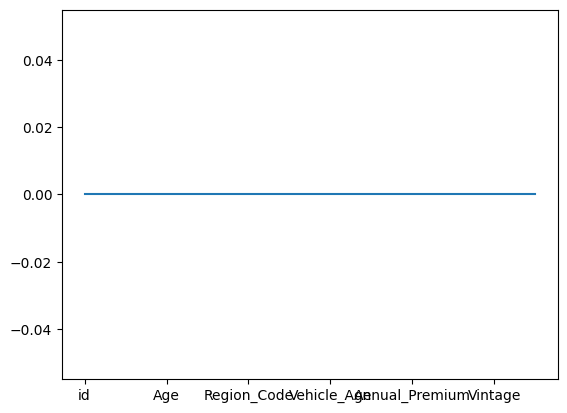

In [ ]:
# Visualizing the missing values
healthcare_data.isnull().sum().plot()

### What did you know about your dataset?

Our dataset contains 381109  rows and 12 columns with zero null values and it has no duplicated rows and it has 3 object columns and six integer three float columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
healthcare_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
healthcare_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

1.   id : a unique Id for each customer.
2.   Gender : is a customer Male or Female.
3.   Age : the age of each customer.
4.   Driving License : does the customer have Driving License or not.
5.   Region_Code : a unique code for the region of the customer.
6.   Previously_insured : does the customer have vehicle insurance or not.
7.   Vehicle_age : the age of the vehicle.
8.   Vehicle_damage : does the vehicle have past damages present or not.
9.   Annual_premium : the amount customer needs to pay as premium.
10.   PolicySalesChannel : the anonymized code for the channel of outreaching to the customer that is different agents, over mail, over phone, in person, etc.
11.   Vintage : the number of days, customer has been associated with the company.
12.   Response : is the customer interested on or not.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in range(0,len(healthcare_data.columns)):
  print("\nunique items in columns no ",i+1, "are:")

  print(healthcare_data.iloc[:,i].unique())


unique items in columns no  1 are:
[     1      2      3 ... 381107 381108 381109]

unique items in columns no  2 are:
['Male' 'Female']

unique items in columns no  3 are:
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

unique items in columns no  4 are:
[1 0]

unique items in columns no  5 are:
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

unique items in columns no  6 are:
[0 1]

unique items in columns no  7 are:
['> 2 Years' '1-2 Year' '< 1 Year']

unique items in columns no  8 are:
['Yes' 'No']

unique items in columns no  9 are:
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

unique items in columns no  10 are:
[ 26. 152. 160. 124.  14.  13.  30. 156.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Creating a copy so that original dataset does not get affected.
data = healthcare_data.copy()

In [ ]:
# Dropping columns id and Region_Code
data = data.drop(['id','Region_Code'],axis=1)
data['Vehicle_Age'] = data['Vehicle_Age'].str.strip('>,<,-,Year,Years')
data['Vehicle_Age'] = data['Vehicle_Age'].str.lstrip('1-,,')
data['Vehicle_Age'].unique()
data['Vehicle_Age']=data['Vehicle_Age'].astype('int')

### What all manipulations have you done and insights you found?

I removed both the 'id' and 'Region_code' columns from the dataset. I performed data cleaning on the 'Vehicle_age' column, eliminating any unwanted characters, and then converted it into an integer data type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

This is dist plot and its details are  Series([], Name: Age, dtype: int64) 



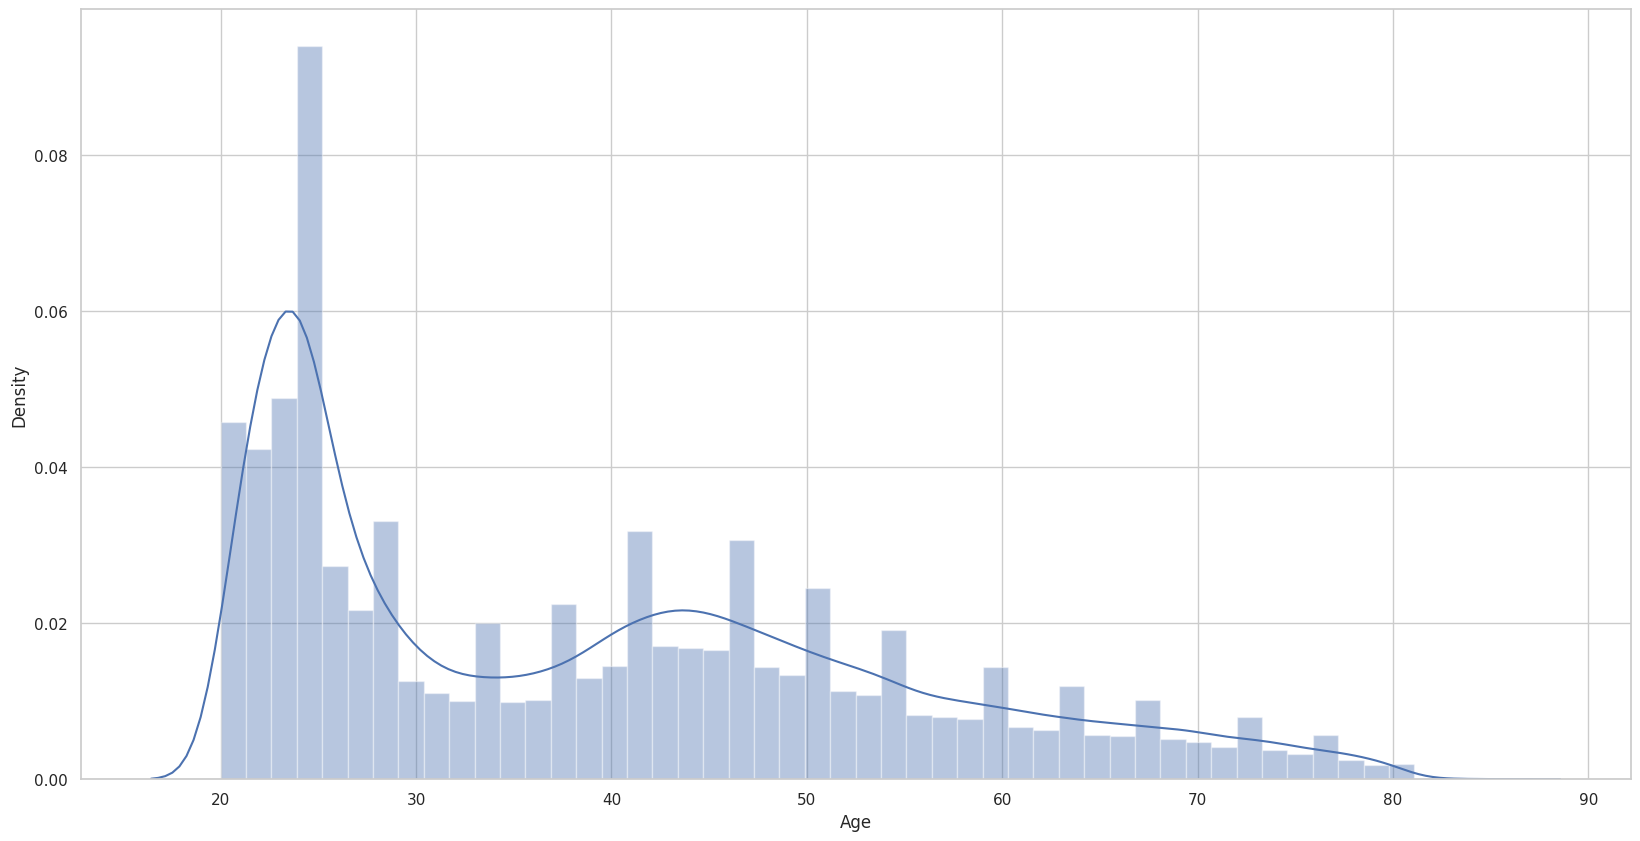

This is dist plot and its details are  Series([], Name: Driving_License, dtype: int64) 



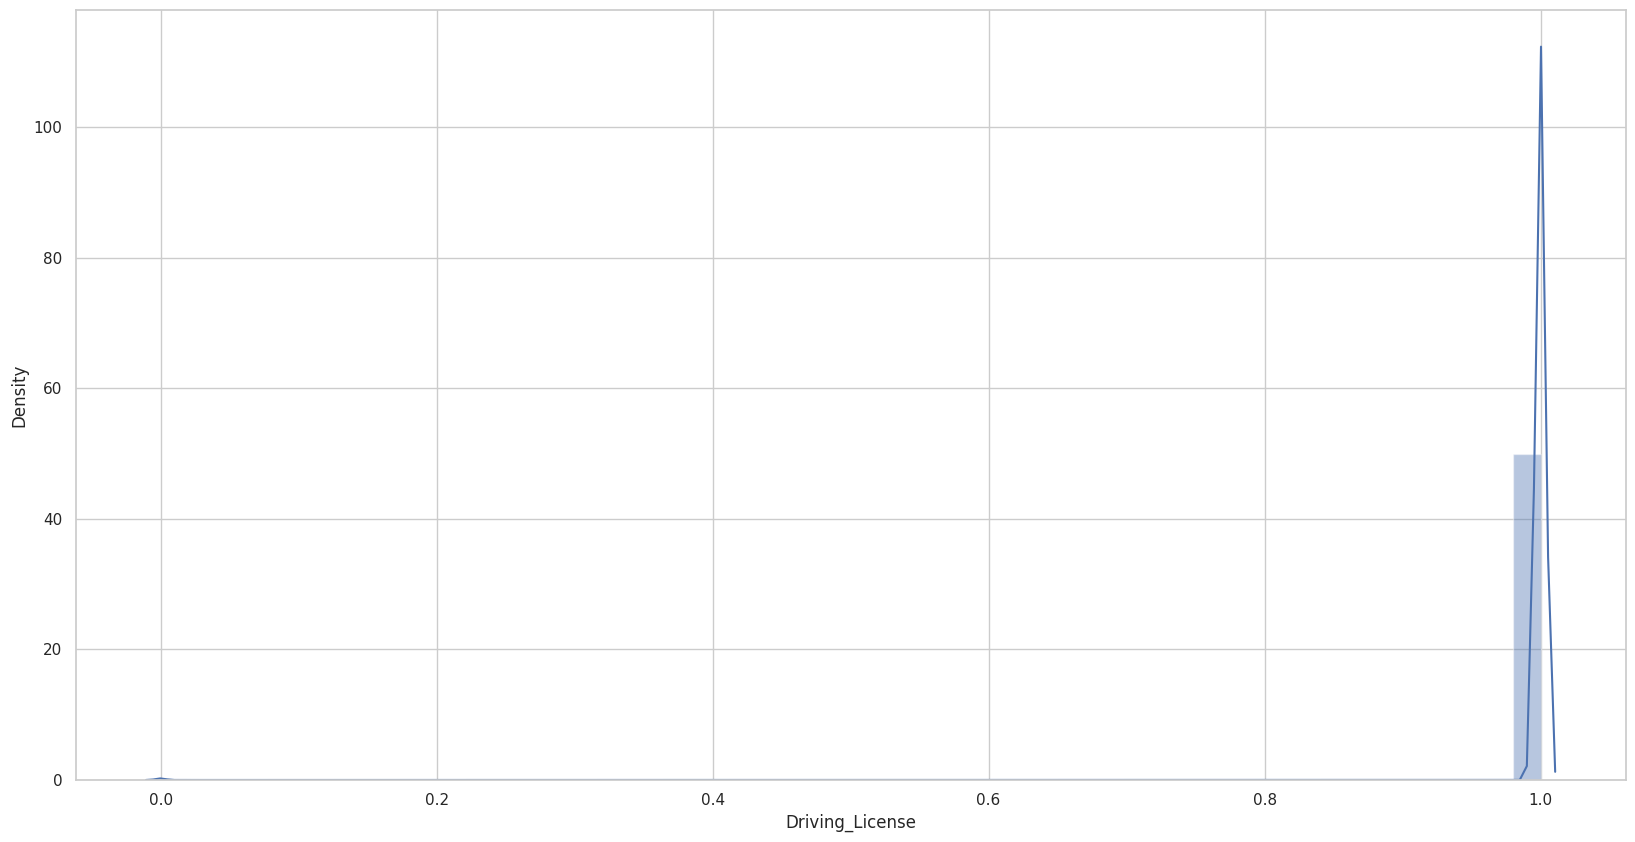

This is dist plot and its details are  Series([], Name: Previously_Insured, dtype: int64) 



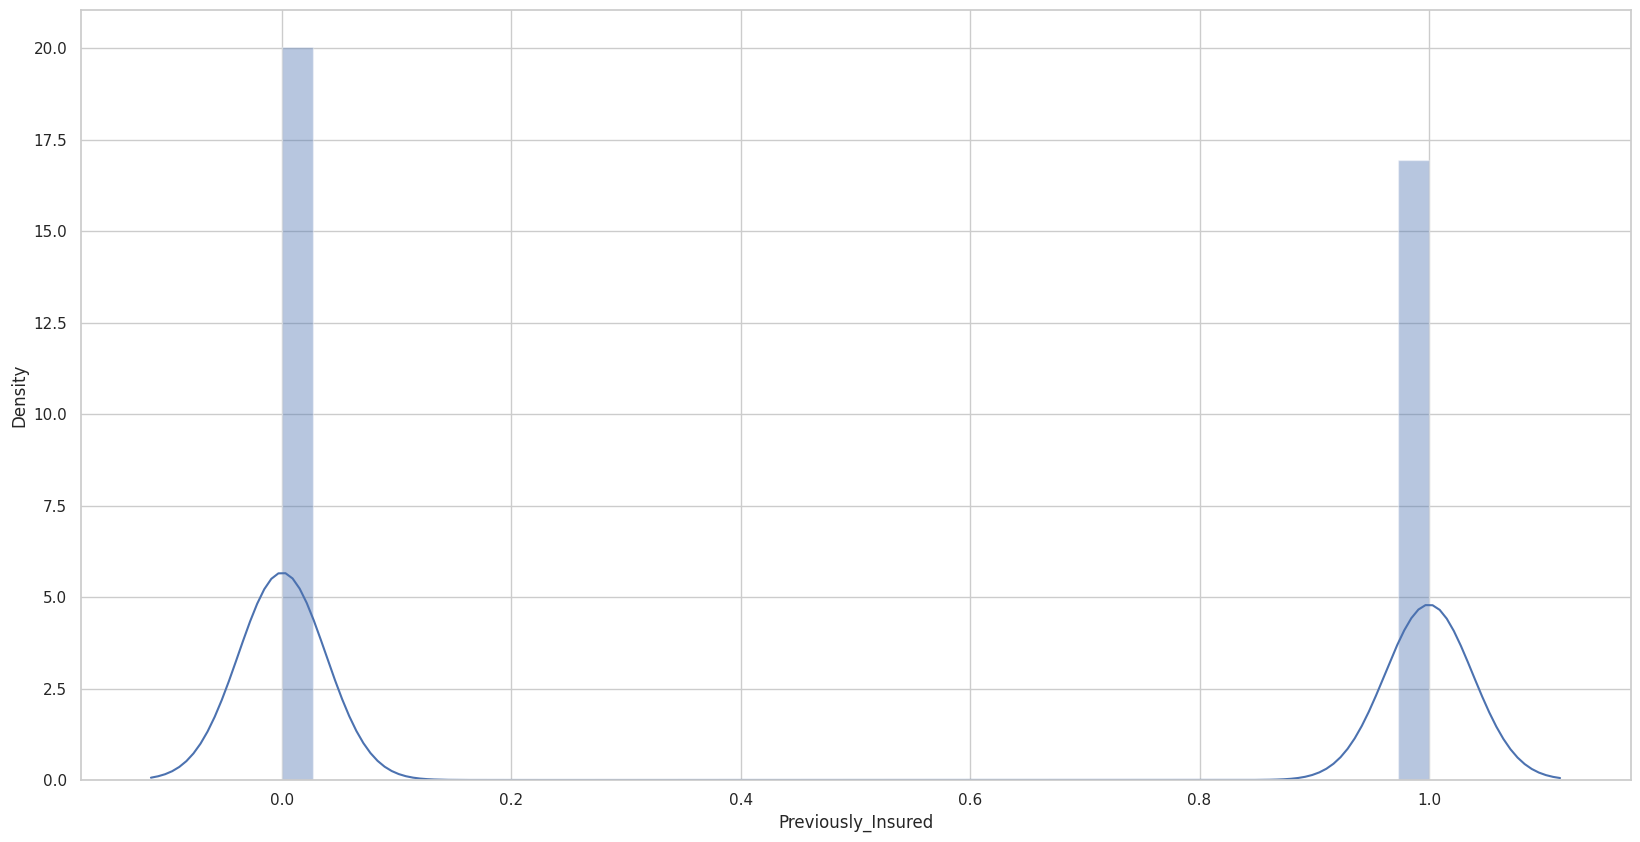

This is dist plot and its details are  Series([], Name: Vehicle_Age, dtype: int64) 



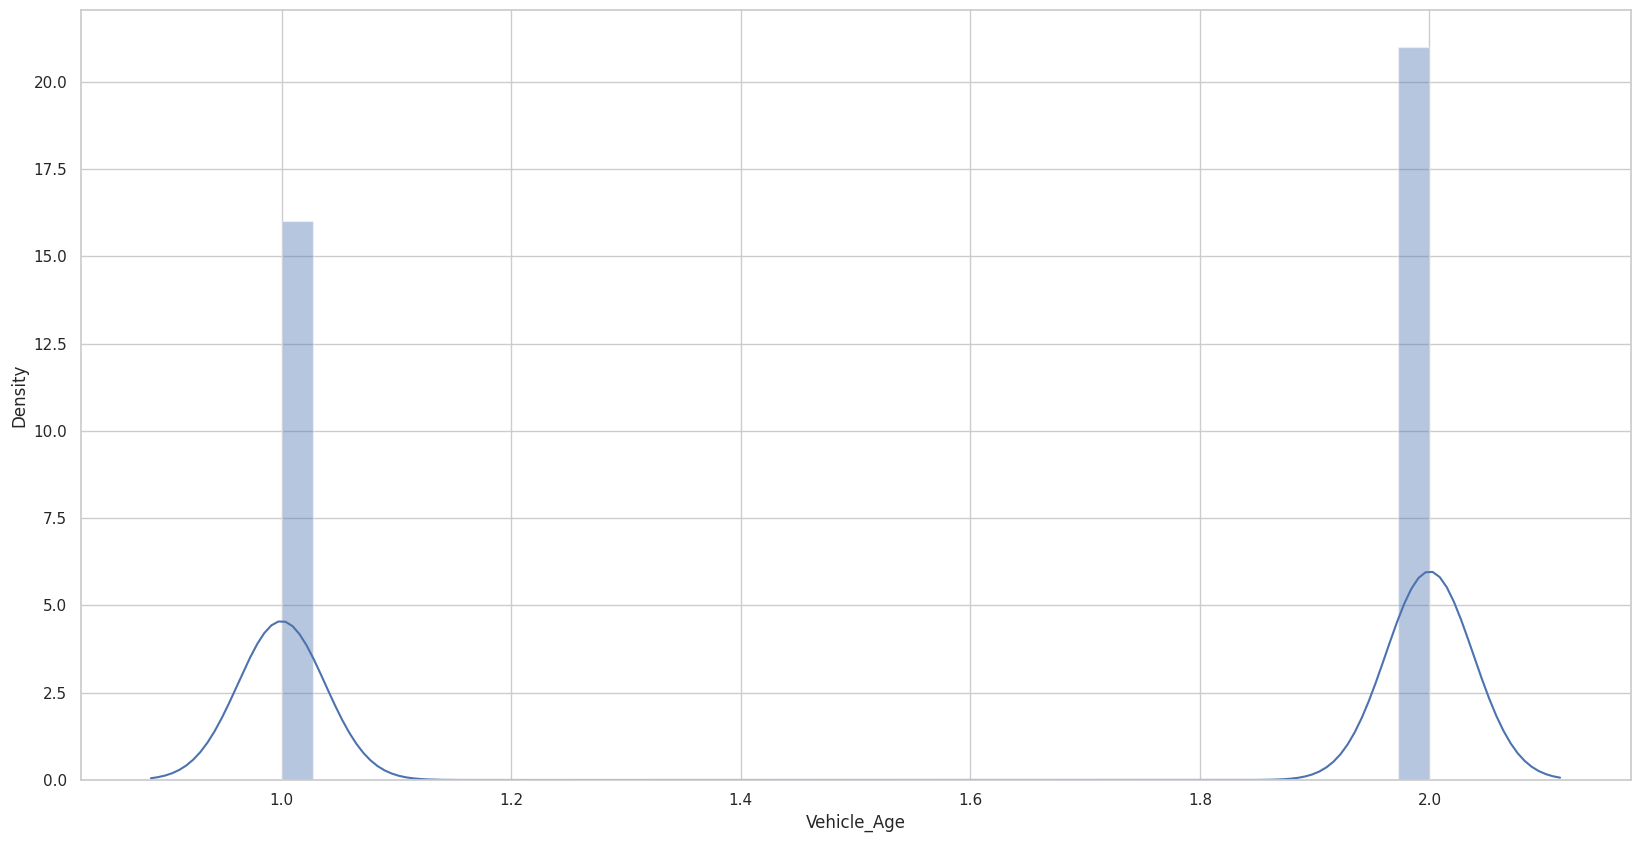

This is dist plot and its details are  Series([], Name: Annual_Premium, dtype: float64) 



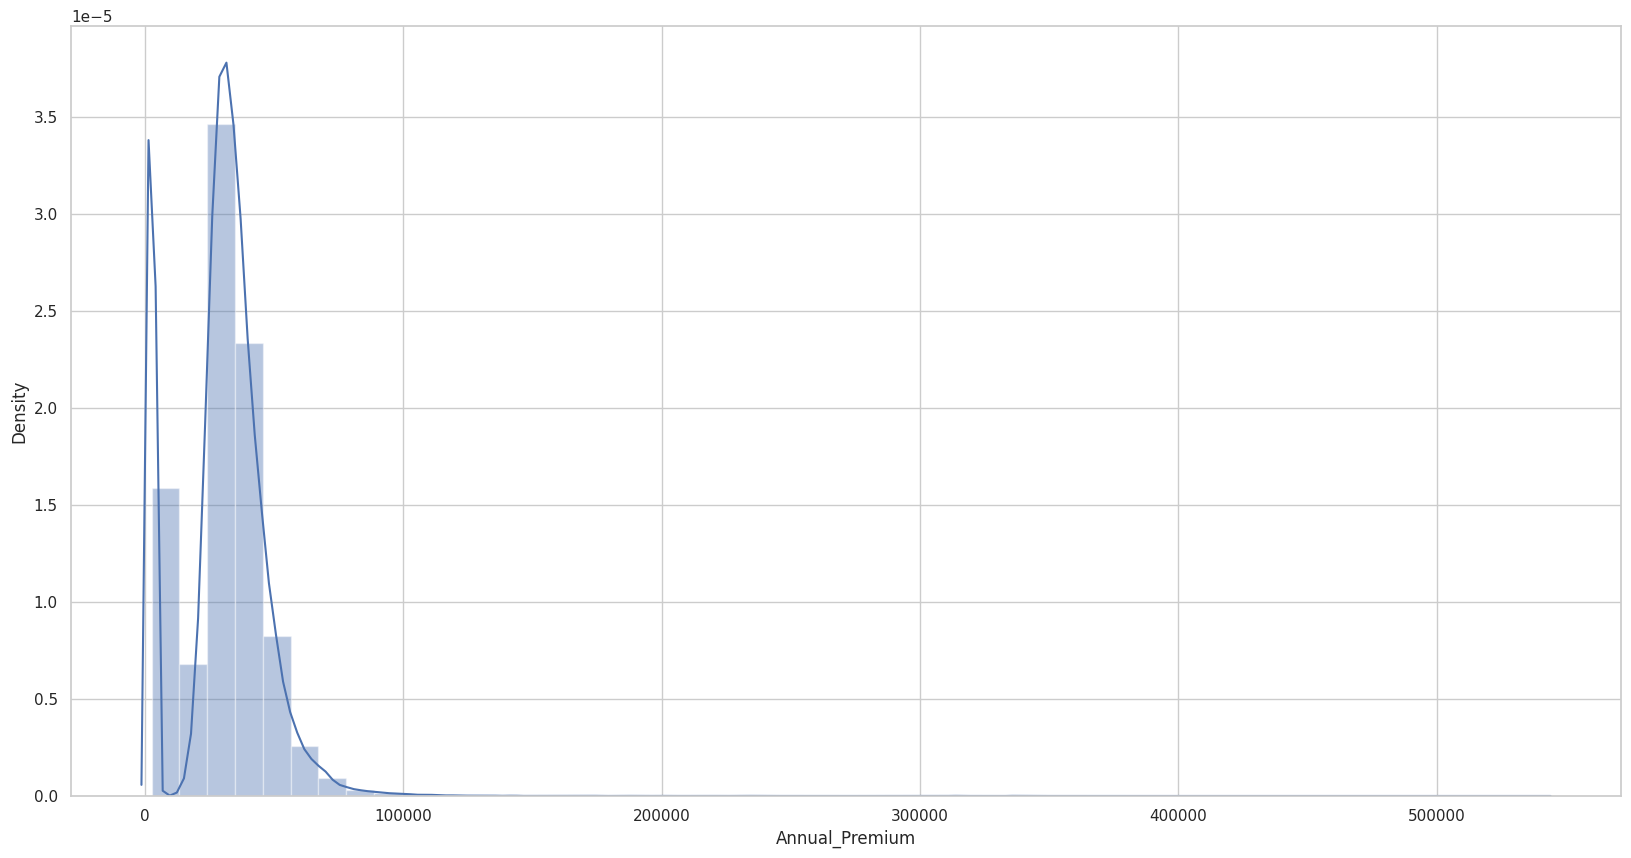

This is dist plot and its details are  Series([], Name: Policy_Sales_Channel, dtype: float64) 



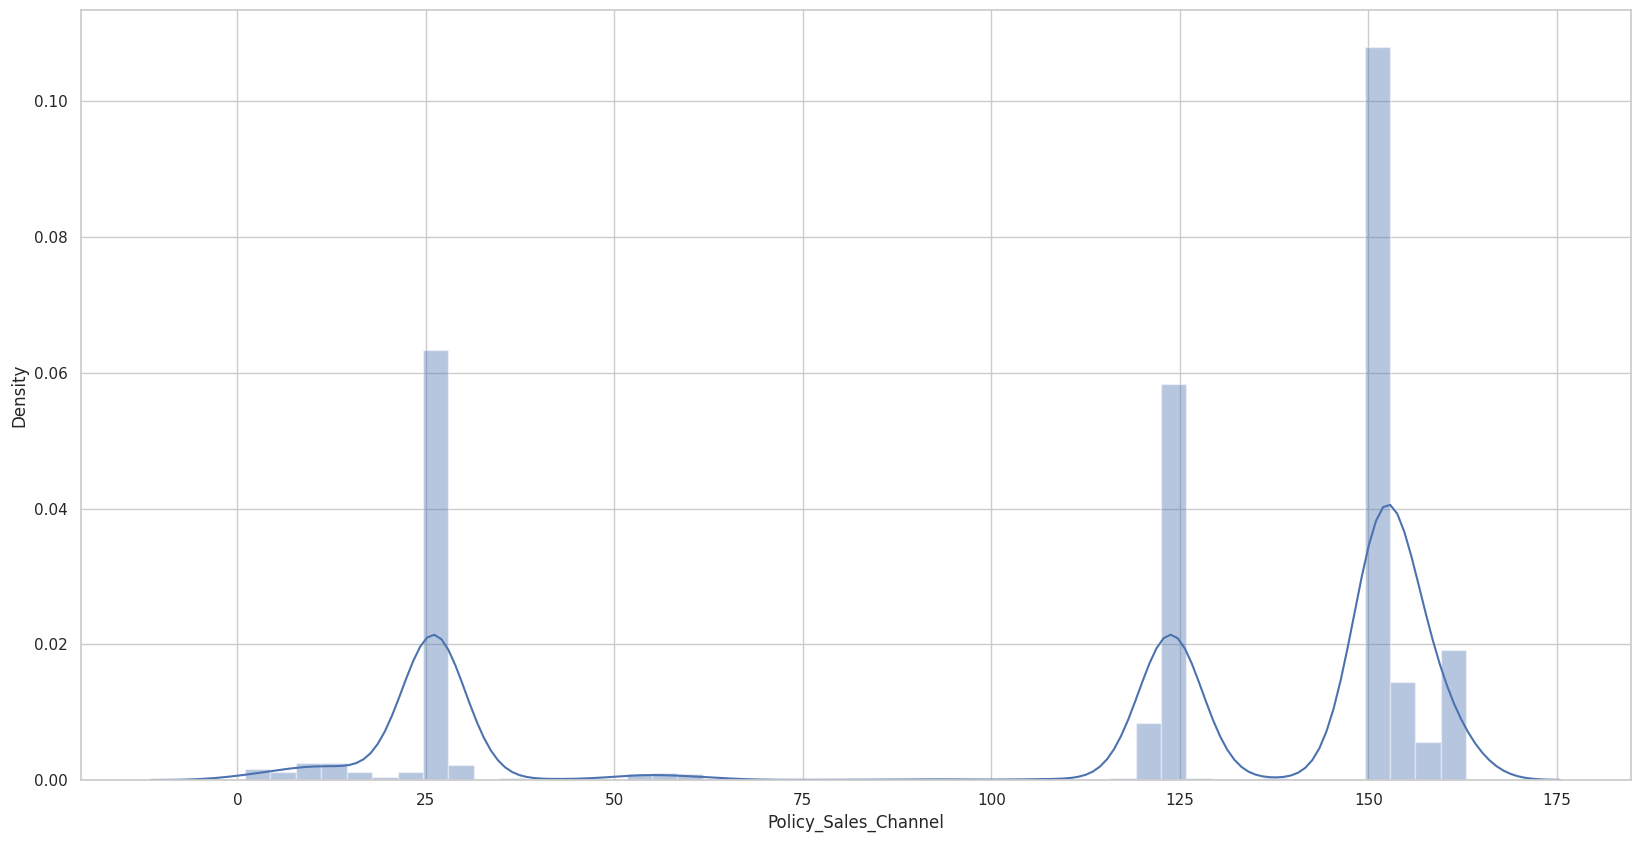

This is dist plot and its details are  Series([], Name: Vintage, dtype: int64) 



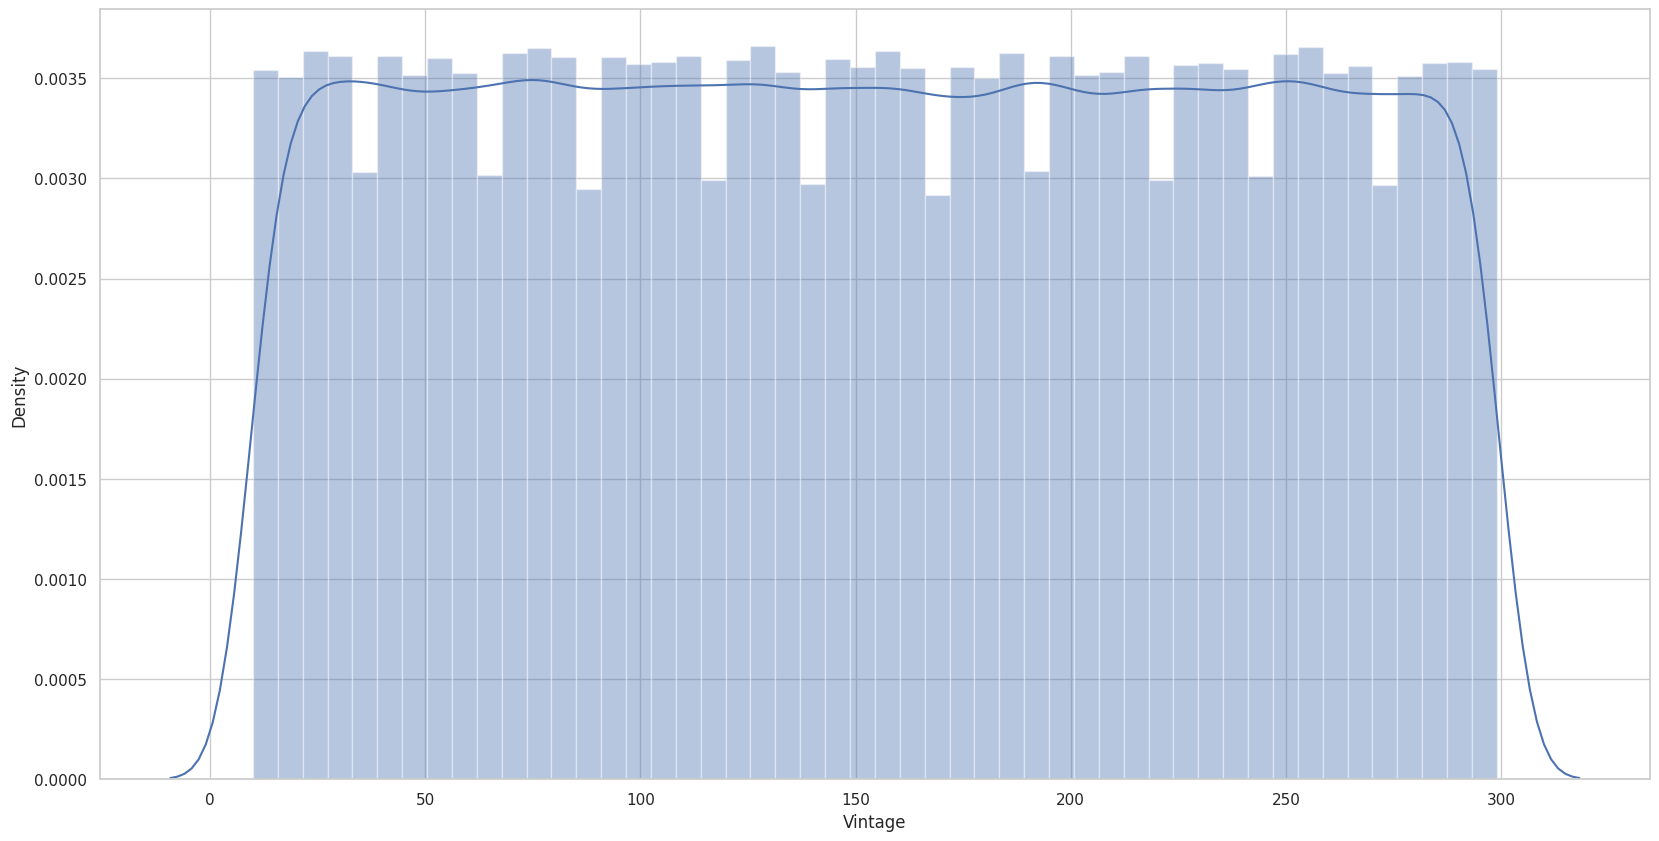

This is dist plot and its details are  Series([], Name: Response, dtype: int64) 



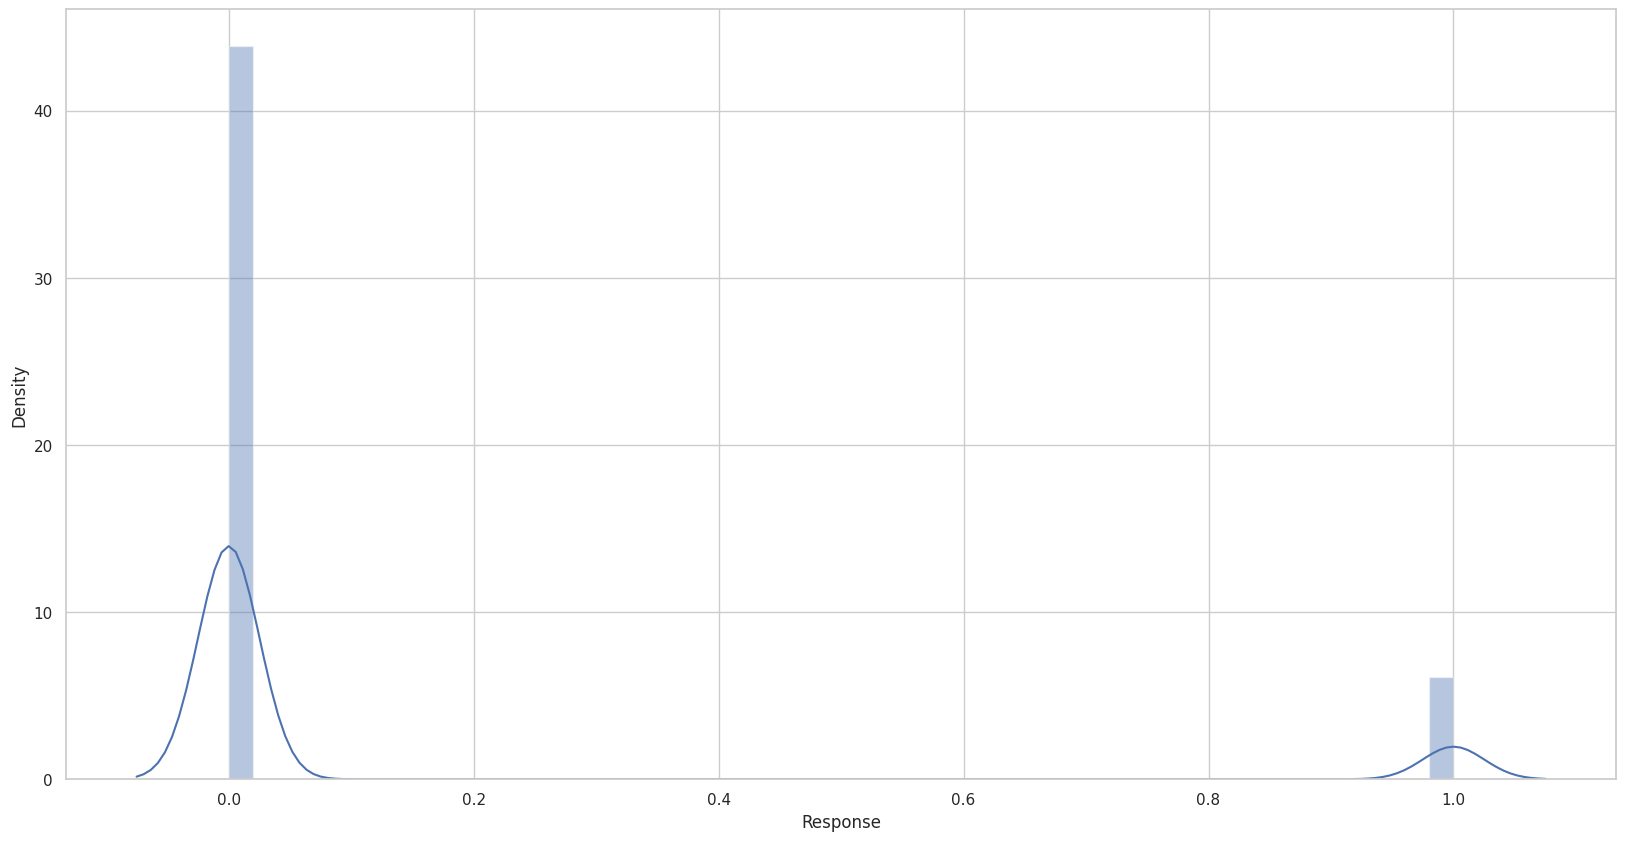

In [ ]:
# Chart - 1 visualization code
for values in range(0,len(data.columns)):
  if np.issubdtype(data.iloc[:,values].dtype, np.number) == True:
    fig = plt.figure(figsize=(20,10))
    sns.set(style='whitegrid')
    plt.title(print("This is dist plot and its details are ",data.iloc[0:0,values],'\n'))
    sns.distplot(data.iloc[:,values])
    plt.show()

##### 1. Why did you pick the specific chart?

A Distplot, short for distribution plot, is a data visualization tool used to visualize the distribution of continuous data variables. It is commonly used in data analysis and data exploration to gain insights into the underlying data distribution. To create a Distplot, the Seaborn module is often used in combination with the Matplotlib module. The Distplot visually represents the data distribution by combining a histogram and a line plot. The histogram provides a graphical representation of the data's frequency distribution, while the line plot can be used to represent the estimated probability density function of the data.

##### 2. What is/are the insight(s) found from the chart?

The mean value of age, Previously_Insured and Response columns have higher mean value than 50 percentile and remaining columns have lower mean value than its 50 percentile so they are right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company has the ability to assess the performance of each individual column in the dataset to determine whether the gathered data meets their desired criteria or requirements. This evaluation allows them to gauge the quality and reliability of the data in each specific column.

#### Chart - 2

This is Box plot and its details are  Series([], Name: Age, dtype: int64) 



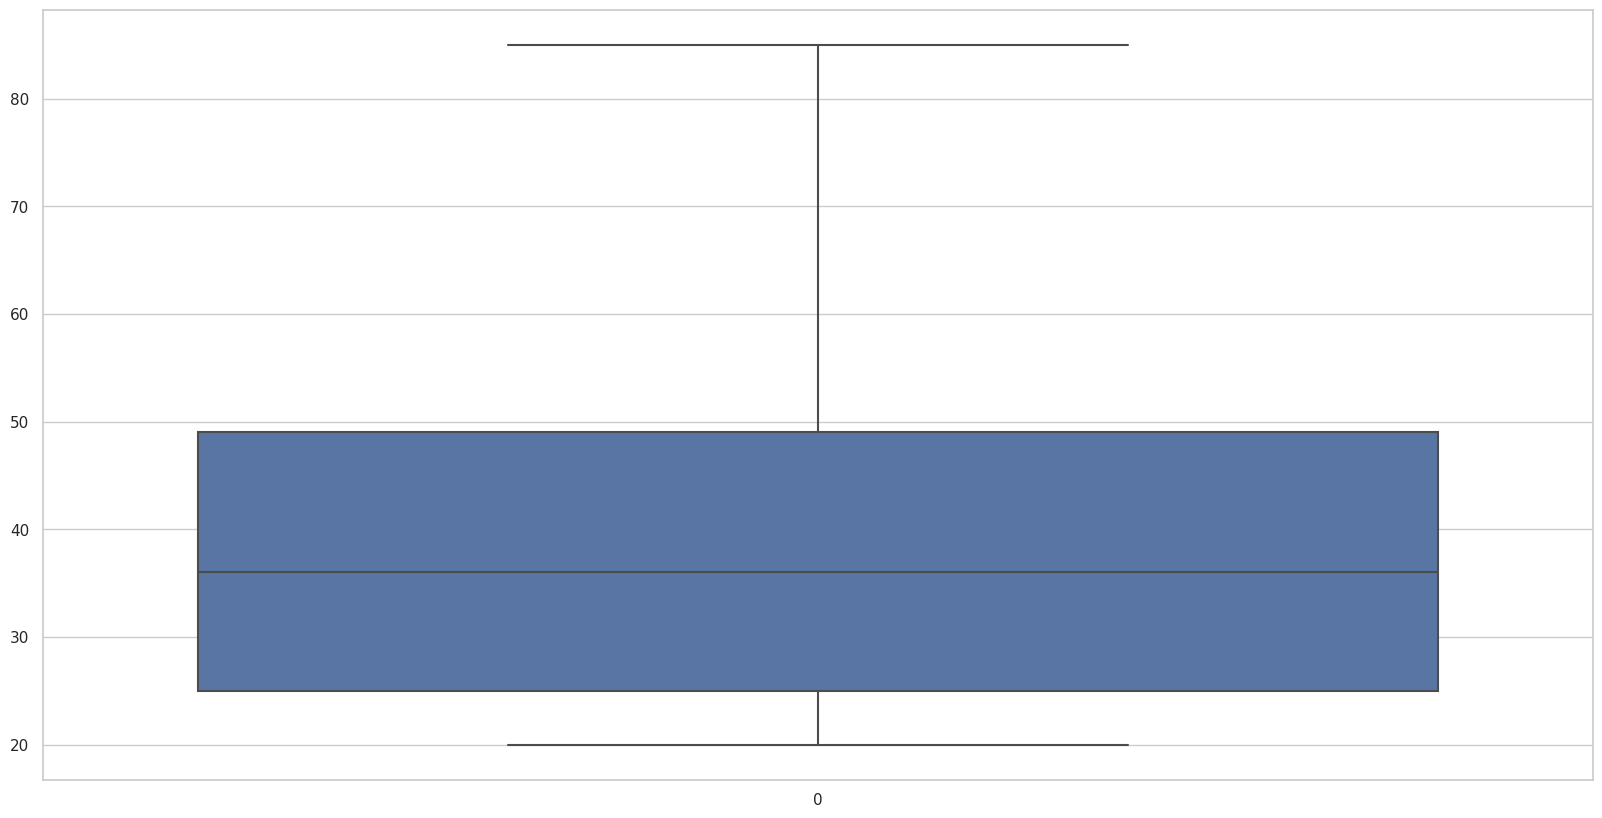

This is Box plot and its details are  Series([], Name: Driving_License, dtype: int64) 



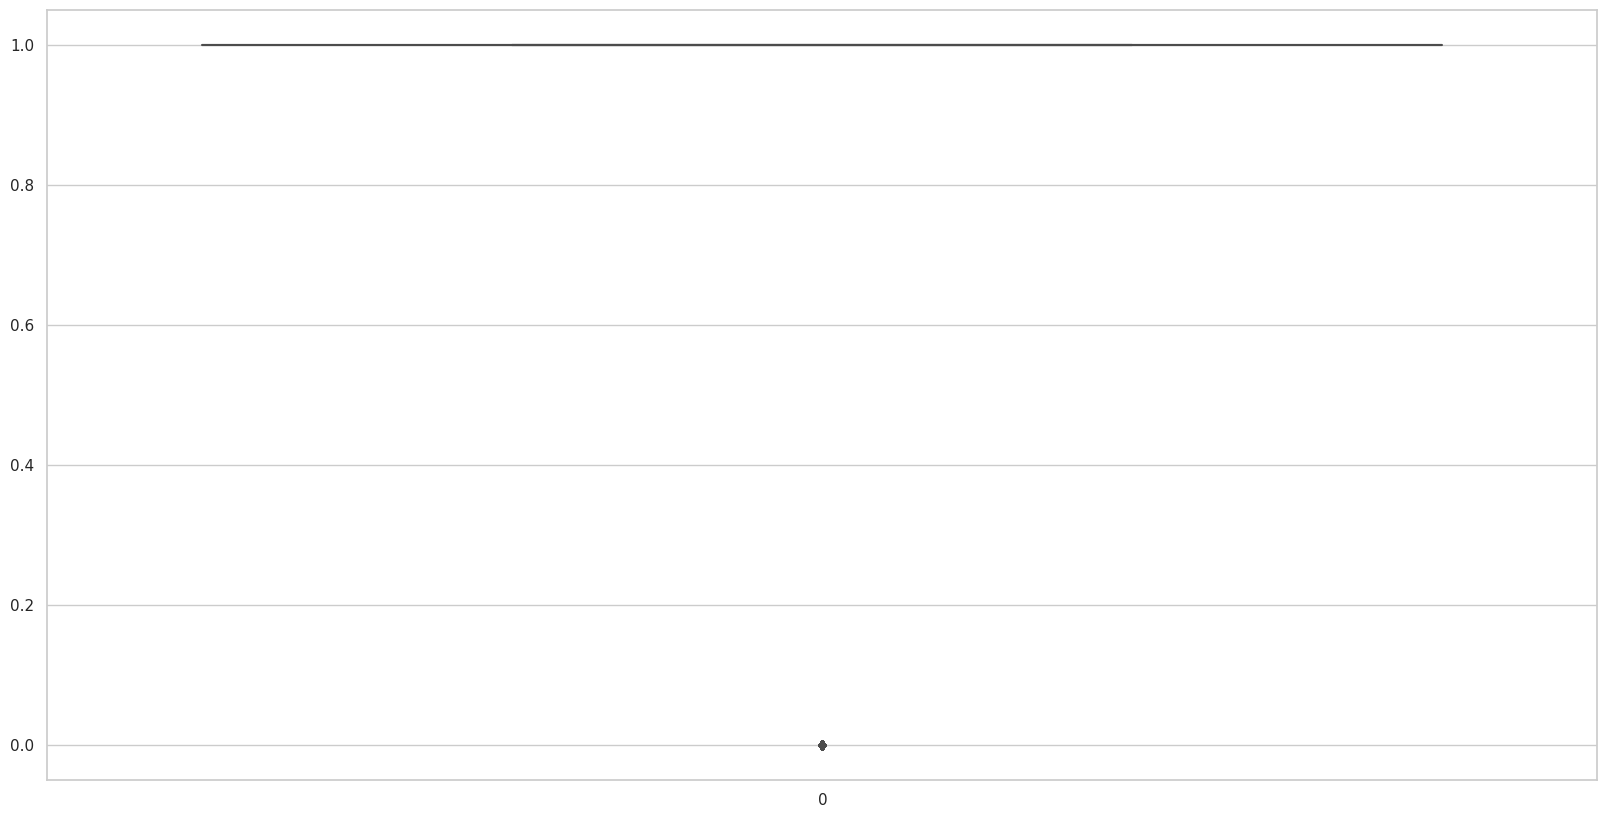

This is Box plot and its details are  Series([], Name: Previously_Insured, dtype: int64) 



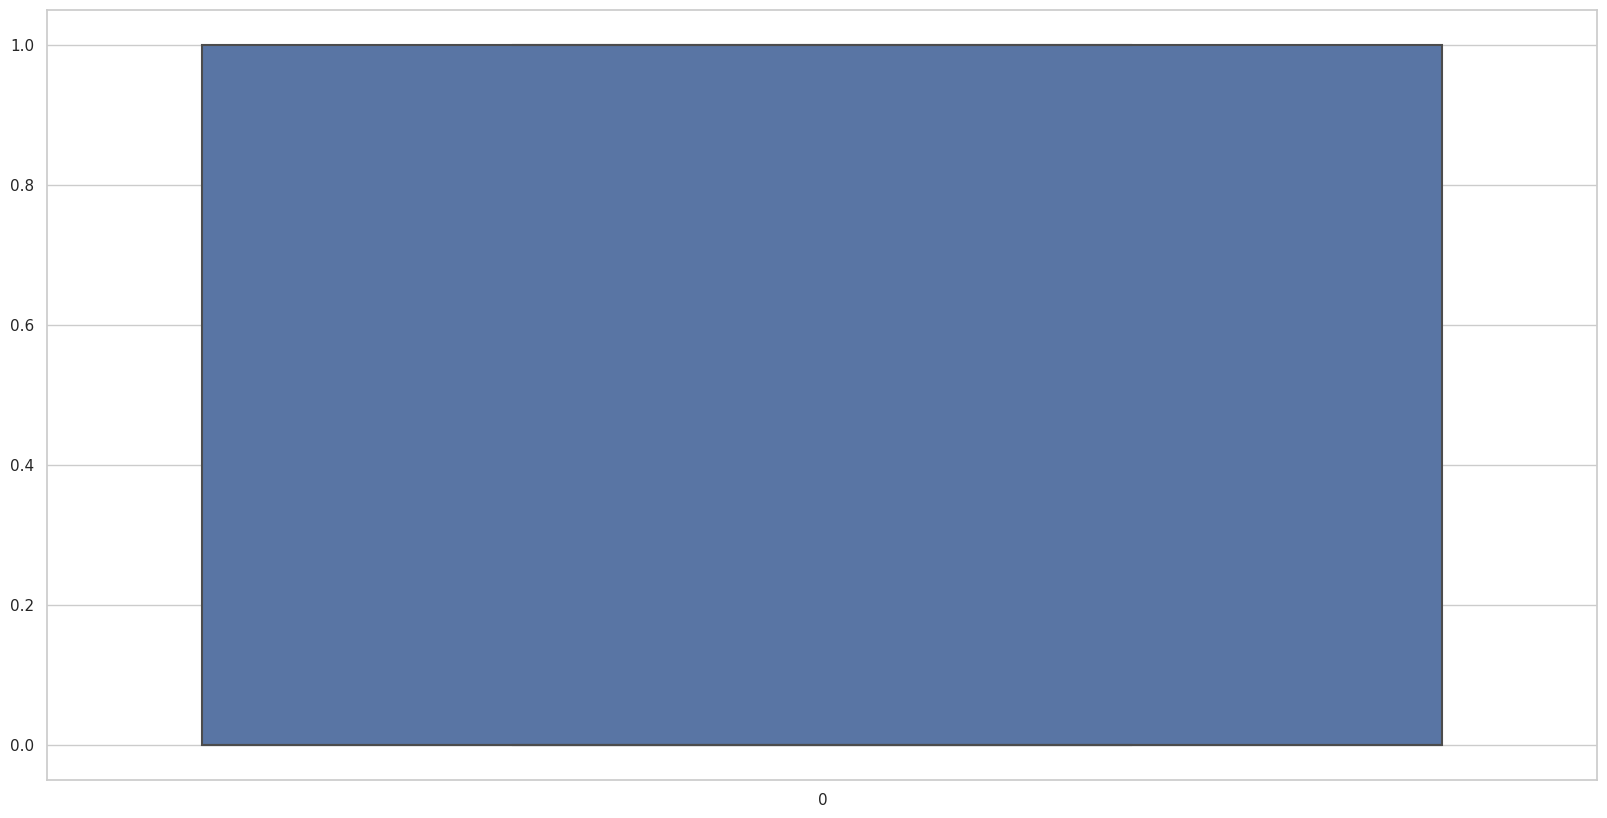

This is Box plot and its details are  Series([], Name: Vehicle_Age, dtype: int64) 



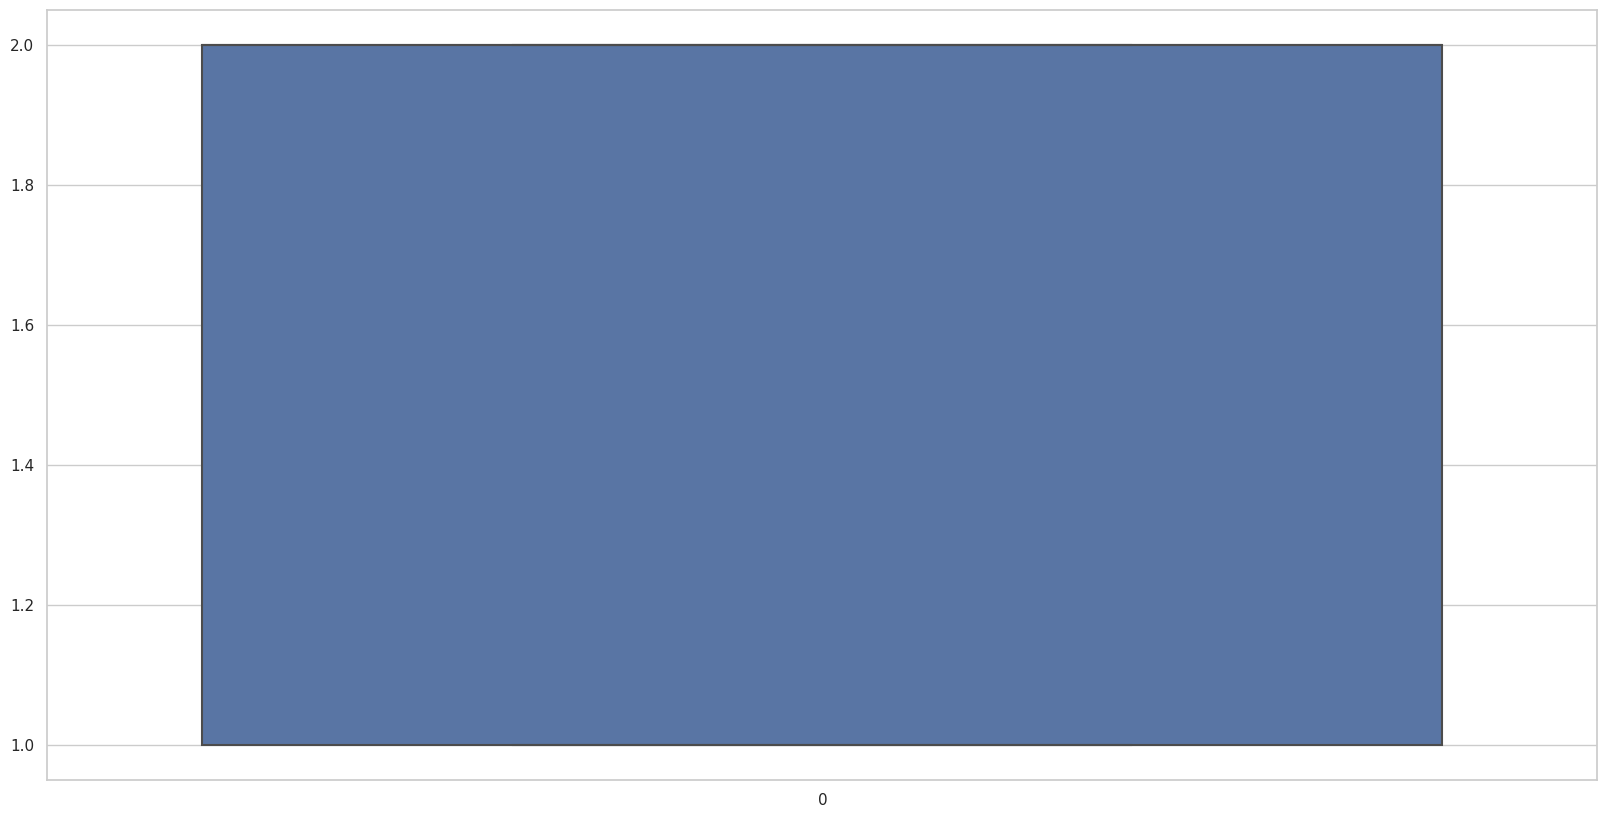

This is Box plot and its details are  Series([], Name: Annual_Premium, dtype: float64) 



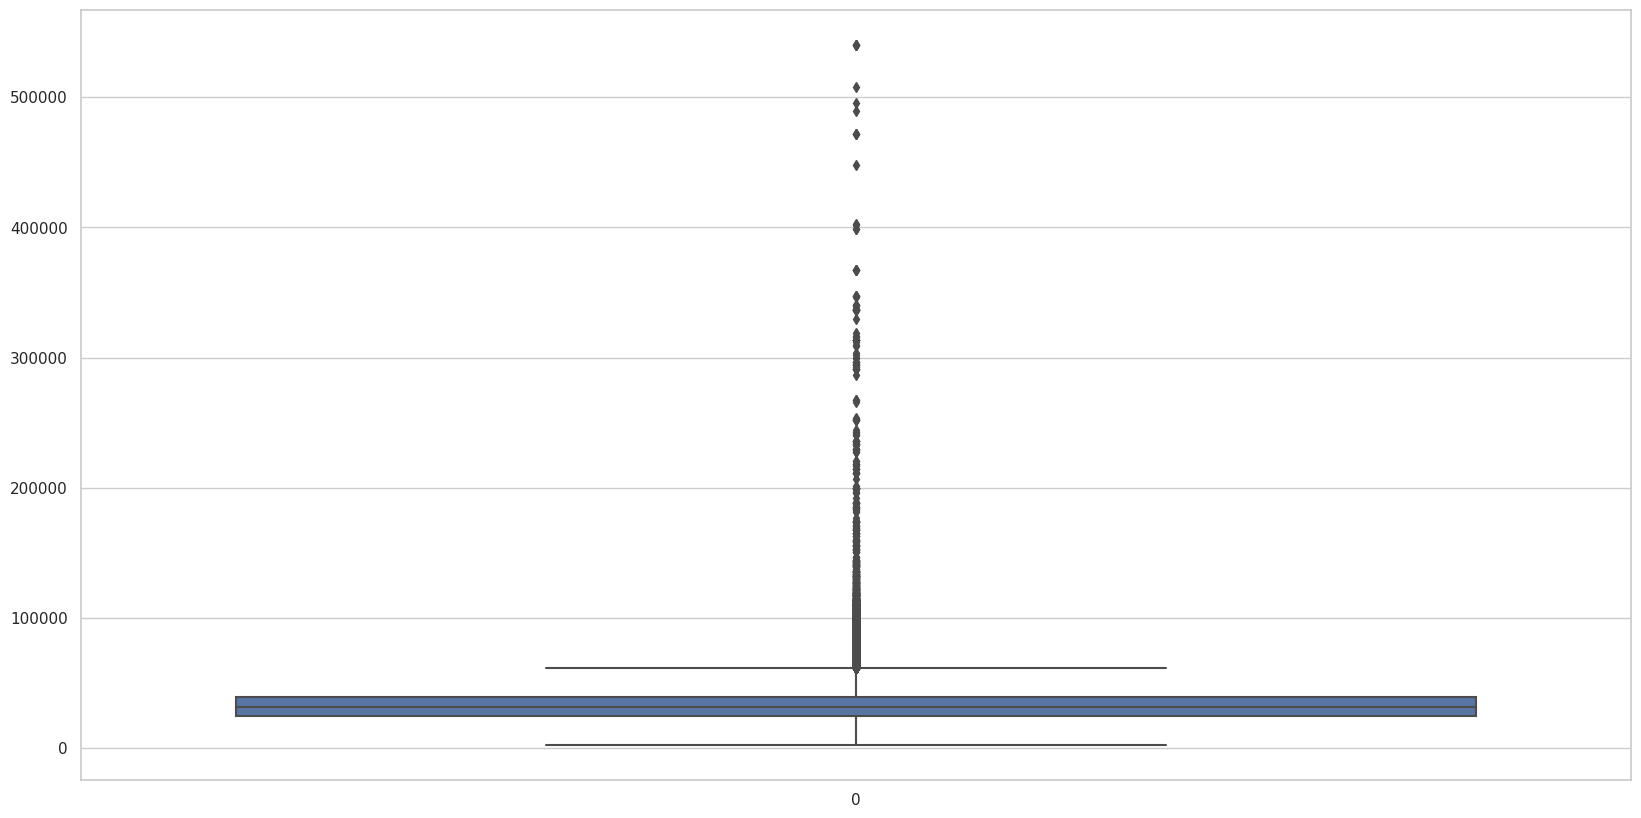

This is Box plot and its details are  Series([], Name: Policy_Sales_Channel, dtype: float64) 



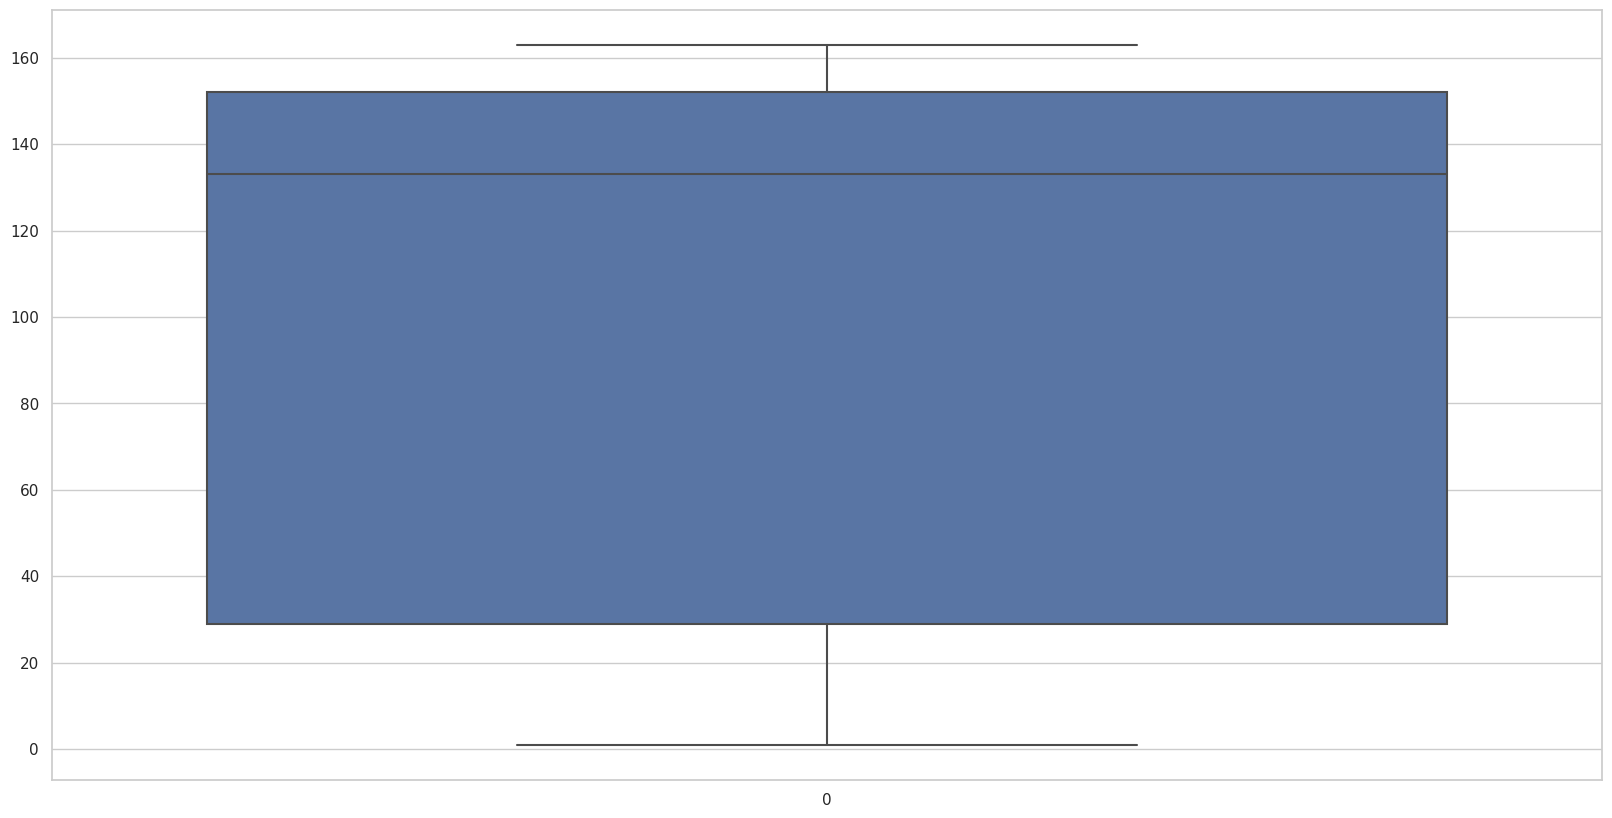

This is Box plot and its details are  Series([], Name: Vintage, dtype: int64) 



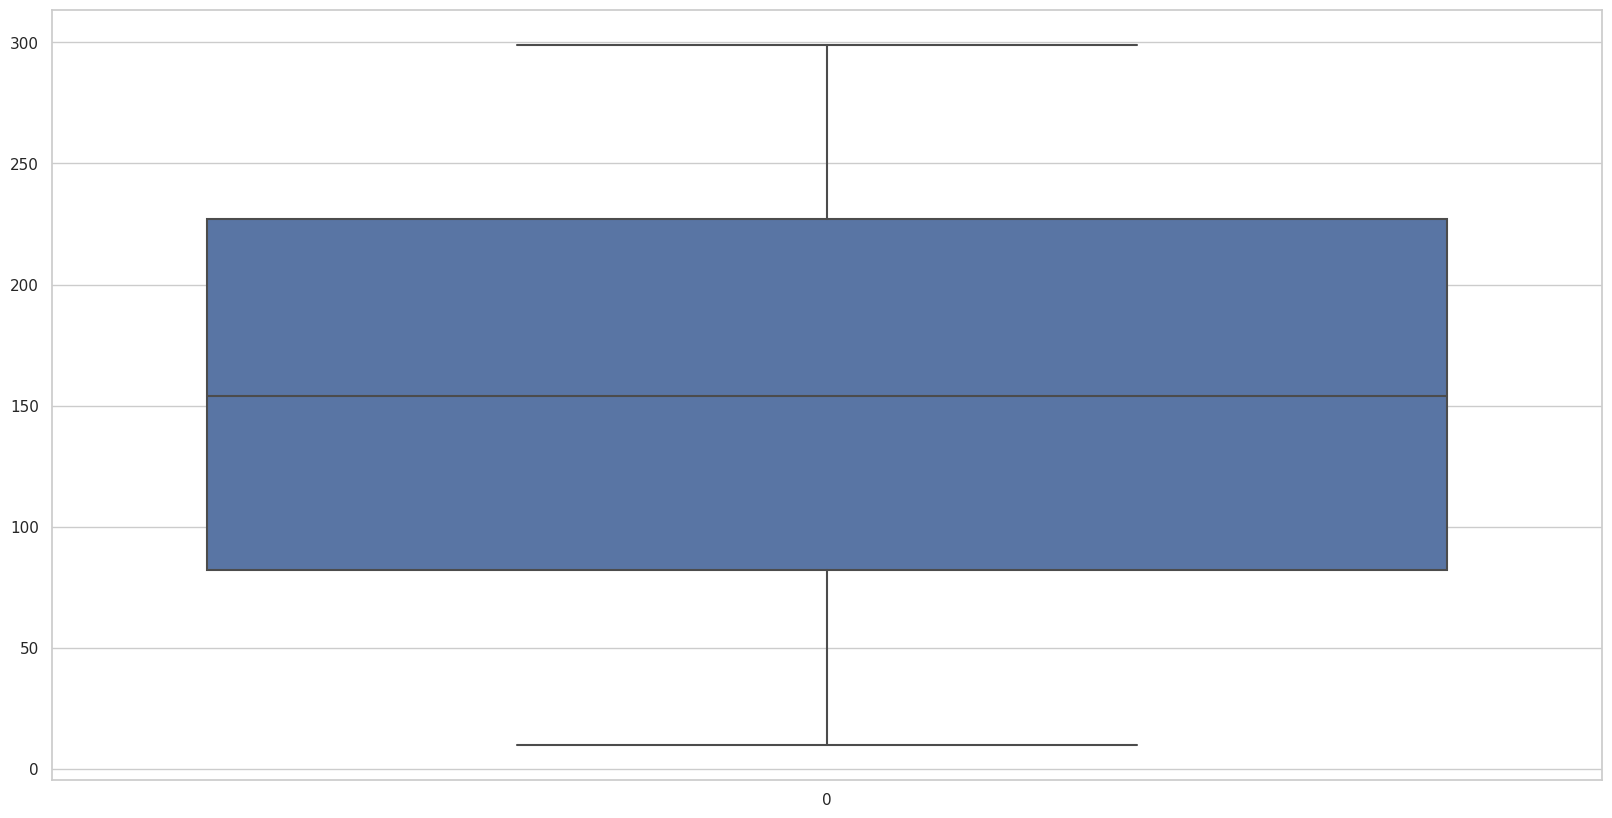

This is Box plot and its details are  Series([], Name: Response, dtype: int64) 



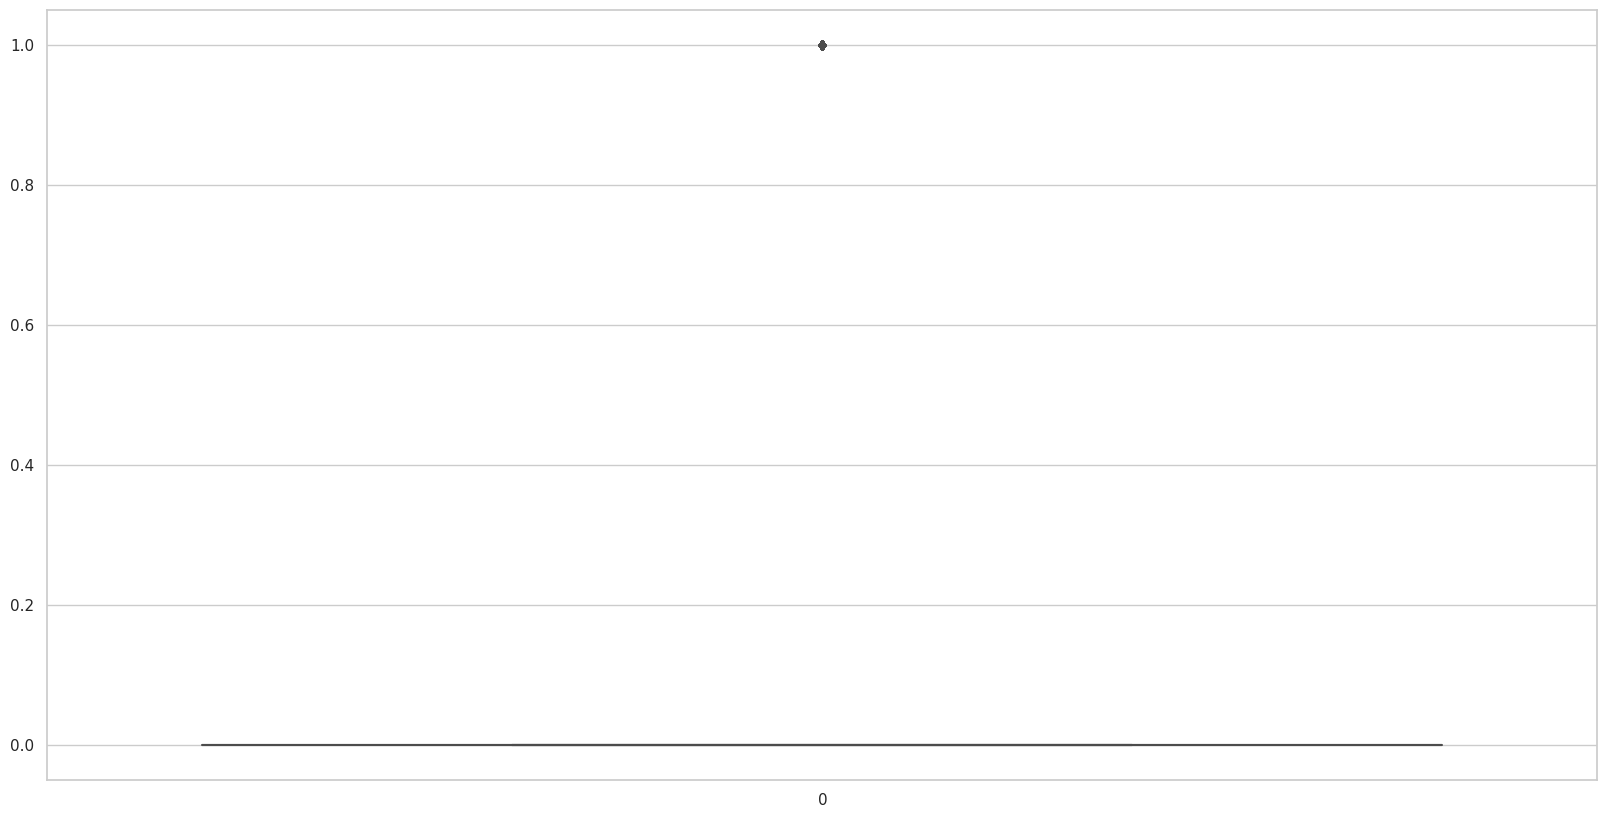

In [ ]:
# Chart - 2 visualization code
for values in range(0,len(data.columns)):
  if np.issubdtype(data.iloc[:,values].dtype, np.number):
    fig = plt.figure(figsize=(20,10))
    sns.set(style='whitegrid')
    plt.title(print("This is Box plot and its details are ",data.iloc[0:0,values],'\n'))
    sns.boxplot(data.iloc[:,values])
    plt.show()

##### 1. Why did you pick the specific chart?

A box plot visually represents these five summary statistics - minimum, first quartile, mdeian, third quartile and mazimum using a box-and-whisker format. The box itself spans from the first quartile (Q1) to the third quartile (Q3) and contains the interquartile range (IQR), which is the middle 50% of the data. The line inside the box represents the median.

##### 2. What is/are the insight(s) found from the chart?

The column name Annual_premium contains lot of outliers as shown in the boxplot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

During univariate analysis using box plots, the insurance company can indeed take necessary steps to assess and verify the presence of outliers in the data.

#### Chart - 3

This is line plot and its details are  Series([], Name: Age, dtype: int64) 



<Axes: xlabel='Age', ylabel='Response'>

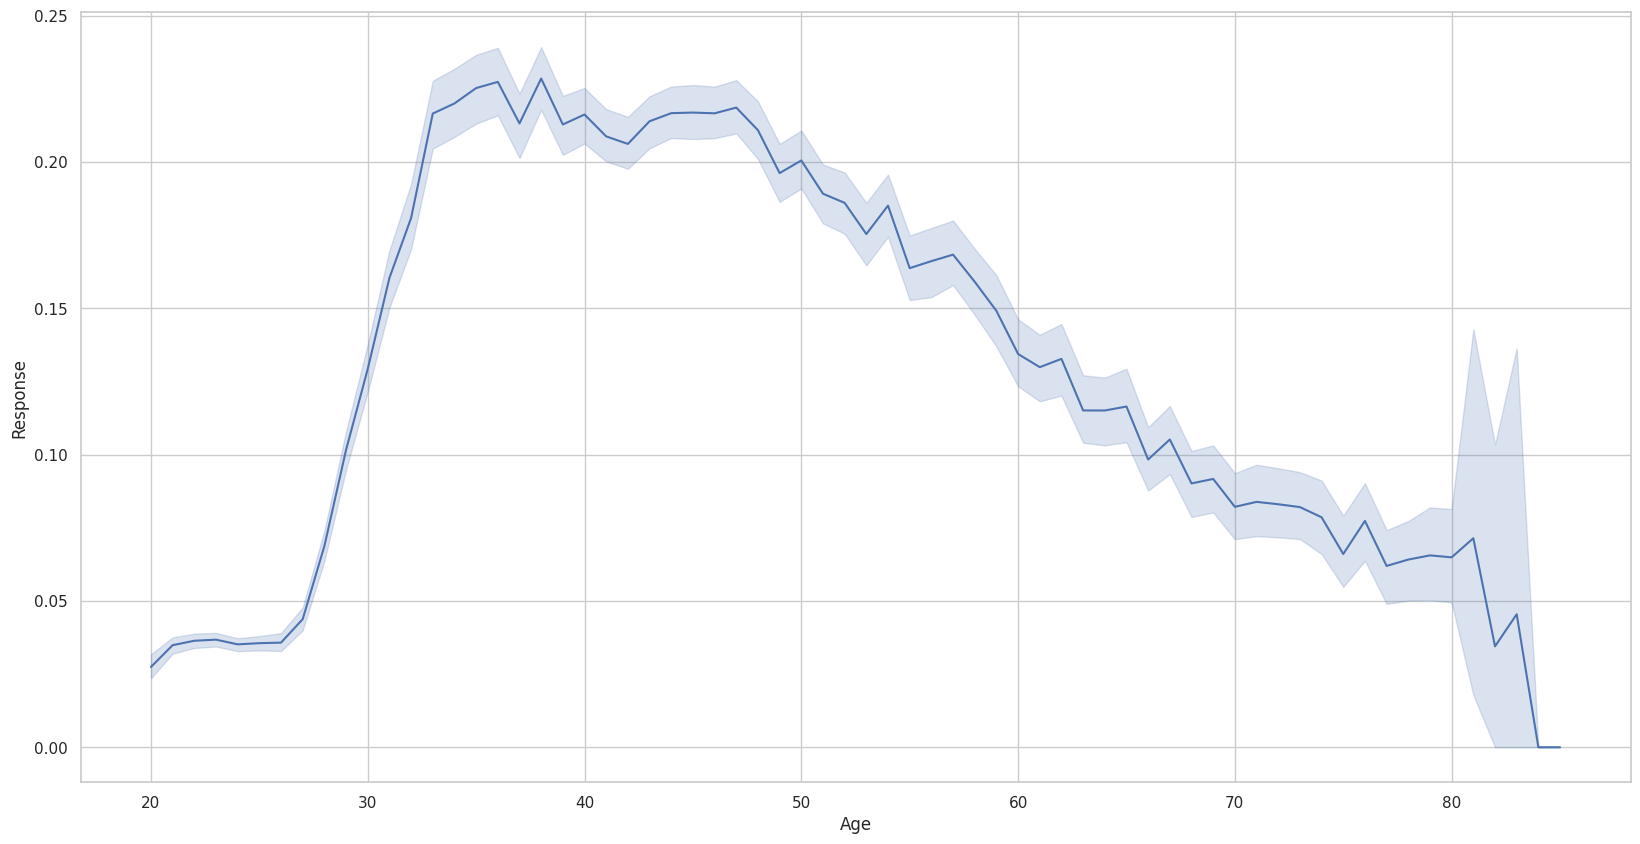

In [ ]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is line plot and its details are ",data.iloc[0:0,1],'\n')
sns.lineplot(x=data.iloc[:,1],y=data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

The Seaborn Line Plots display the connection or correlation between continuous and categorical values by representing them in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

The response shows an upward trend between the ages of 20 to 35, remains relatively stable between the ages of 35 to 50, and then starts to decline for individuals aged 50 and above.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the demand for the insurance product is highest among individuals aged up to 35 years, the company should consider targeting customers within that age bracket.

#### Chart - 4

This is bar plot and its details are  Series([], Name: Driving_License, dtype: int64) 



<Axes: xlabel='Driving_License', ylabel='Response'>

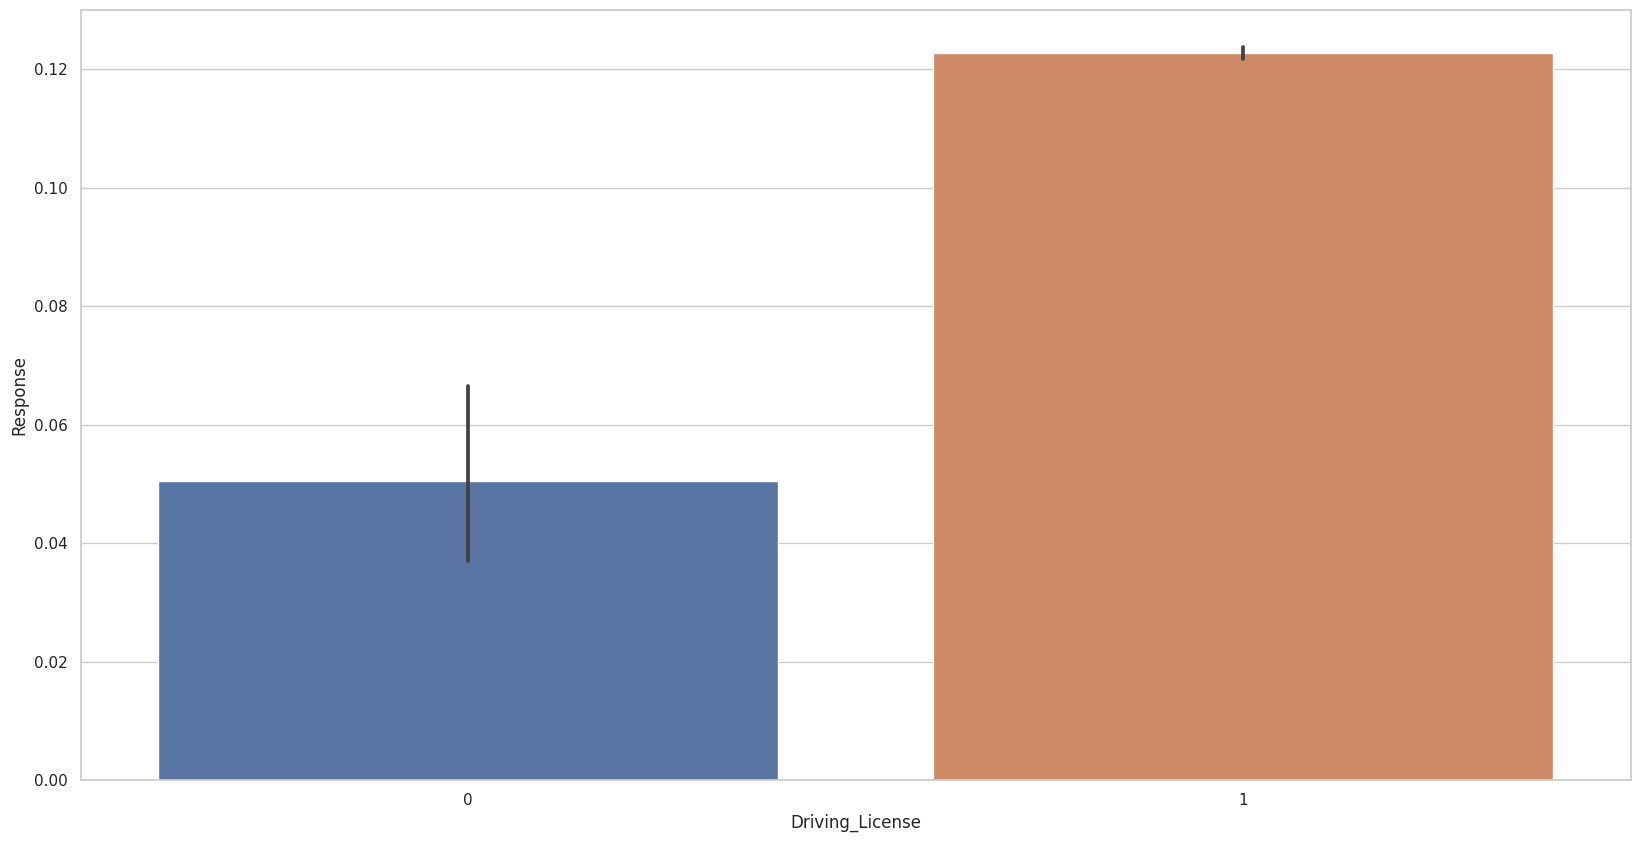

In [ ]:
# Chart - 4 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is bar plot and its details are ",data.iloc[0:0,2],'\n')
sns.barplot(x=data.iloc[:,2],y= data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

A bar chart shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

Individuals who possess a driver's license are more inclined to express interest in insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To boost sales, the insurance company can focus its efforts on targeting customers who hold a valid driving license.

#### Chart - 5

This is line plot and its details are  Series([], Name: Previously_Insured, dtype: int64) 



<Axes: xlabel='Previously_Insured', ylabel='Response'>

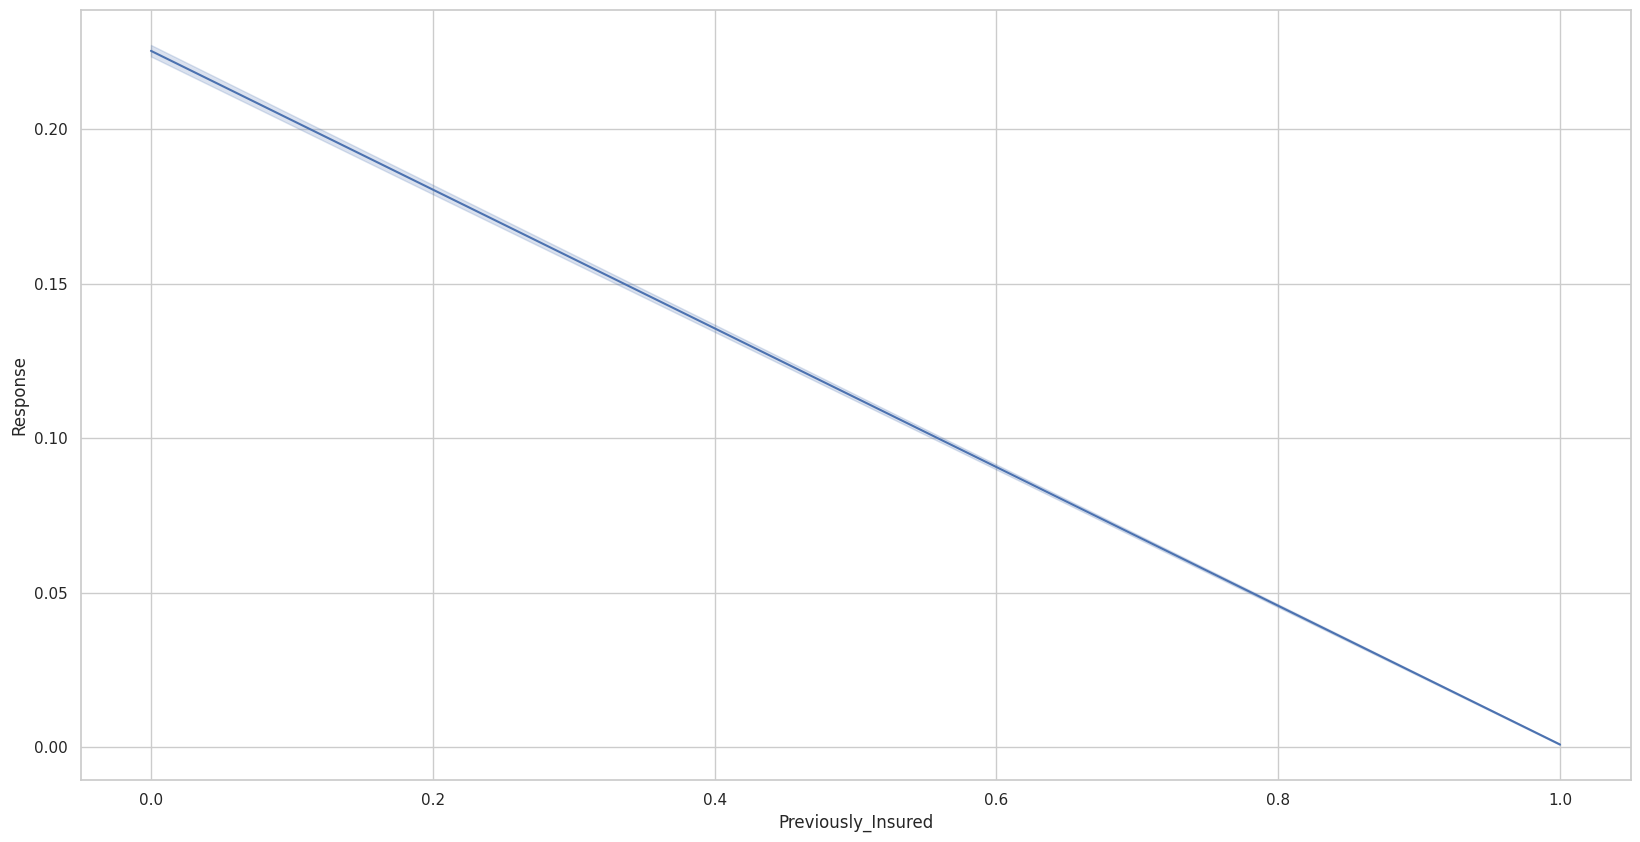

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is line plot and its details are ",data.iloc[0:0,3],'\n')
sns.lineplot(x=data.iloc[:,3],y=data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

The Seaborn Line Plots display the connection or correlation between continuous and categorical values by representing them in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

We observed that customers who have not been previously insured tend to be more responsive compared to those who already have insurance coverage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To enhance the response rate among existing customers, the insurance company should consider evaluating and improving its quality of service and customer support.

#### Chart - 6

This is bar plot and its details are  Series([], Name: Vehicle_Age, dtype: int64) 



<Axes: xlabel='Vehicle_Age', ylabel='Response'>

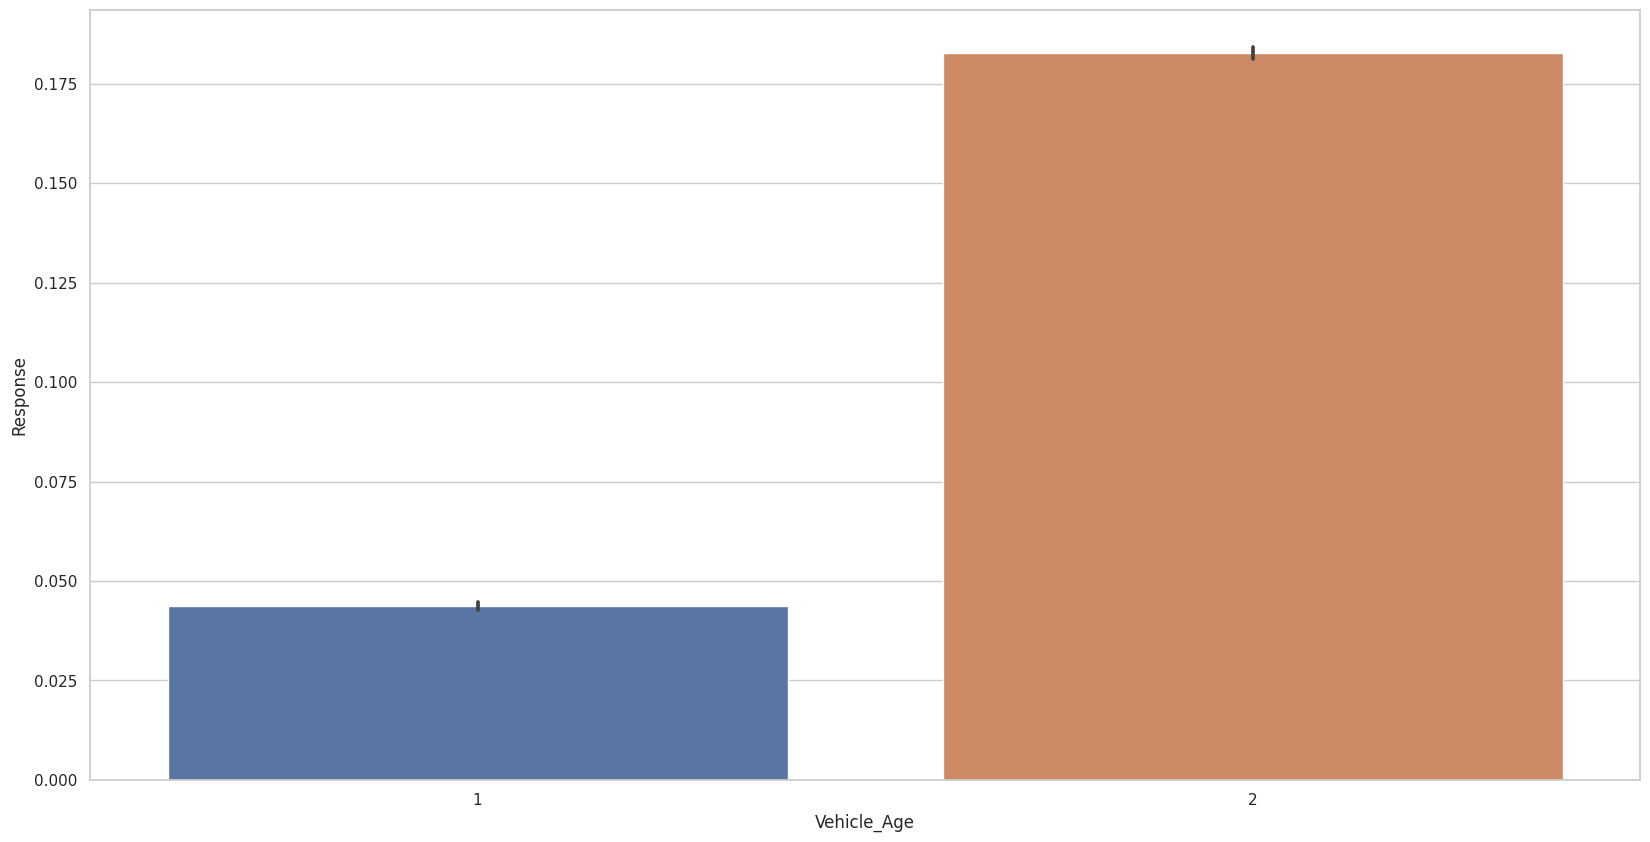

In [ ]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is bar plot and its details are ",data.iloc[0:0,4],'\n')
sns.barplot(x=data.iloc[:,4],y=data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

A bar chart shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

The insurance company has noticed that vehicles older than 2 years tend to have a higher response rate compared to vehicles that are less than 2 years old.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To boost the number of responses, the insurance company should prioritize its efforts towards customers who own vehicles with an age of less than 2 years.

#### Chart - 7

This is bar plot and its details are  Series([], Name: Vehicle_Damage, dtype: object) 



<Axes: xlabel='Vehicle_Damage', ylabel='Response'>

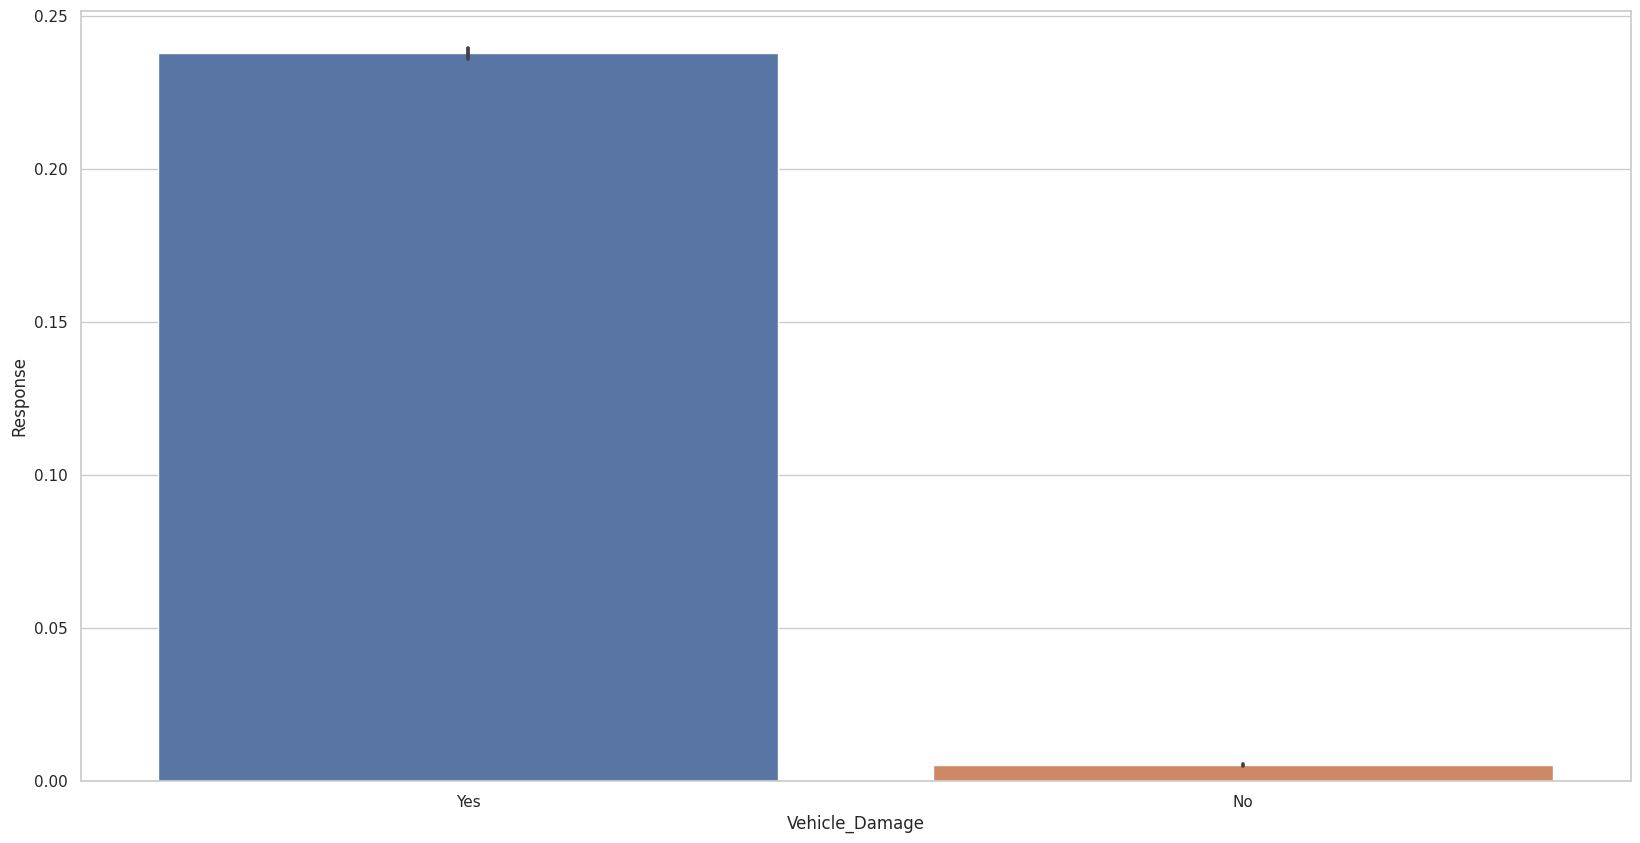

In [ ]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is bar plot and its details are ",data.iloc[0:0,5],'\n')
sns.barplot(x=data.iloc[:,5],y = data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

A bar chart shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

The insurance company has observed that customers whose vehicles have been involved in accidents or sustained damage are more likely to be responsive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can launch an awareness campaign targeting vehicle owners with undamaged vehicles as a strategy to increase sales of their insurance products.

#### Chart - 8

This is line plot and its details are  Series([], Name: Annual_Premium, dtype: float64) 



<Axes: xlabel='Annual_Premium', ylabel='Response'>

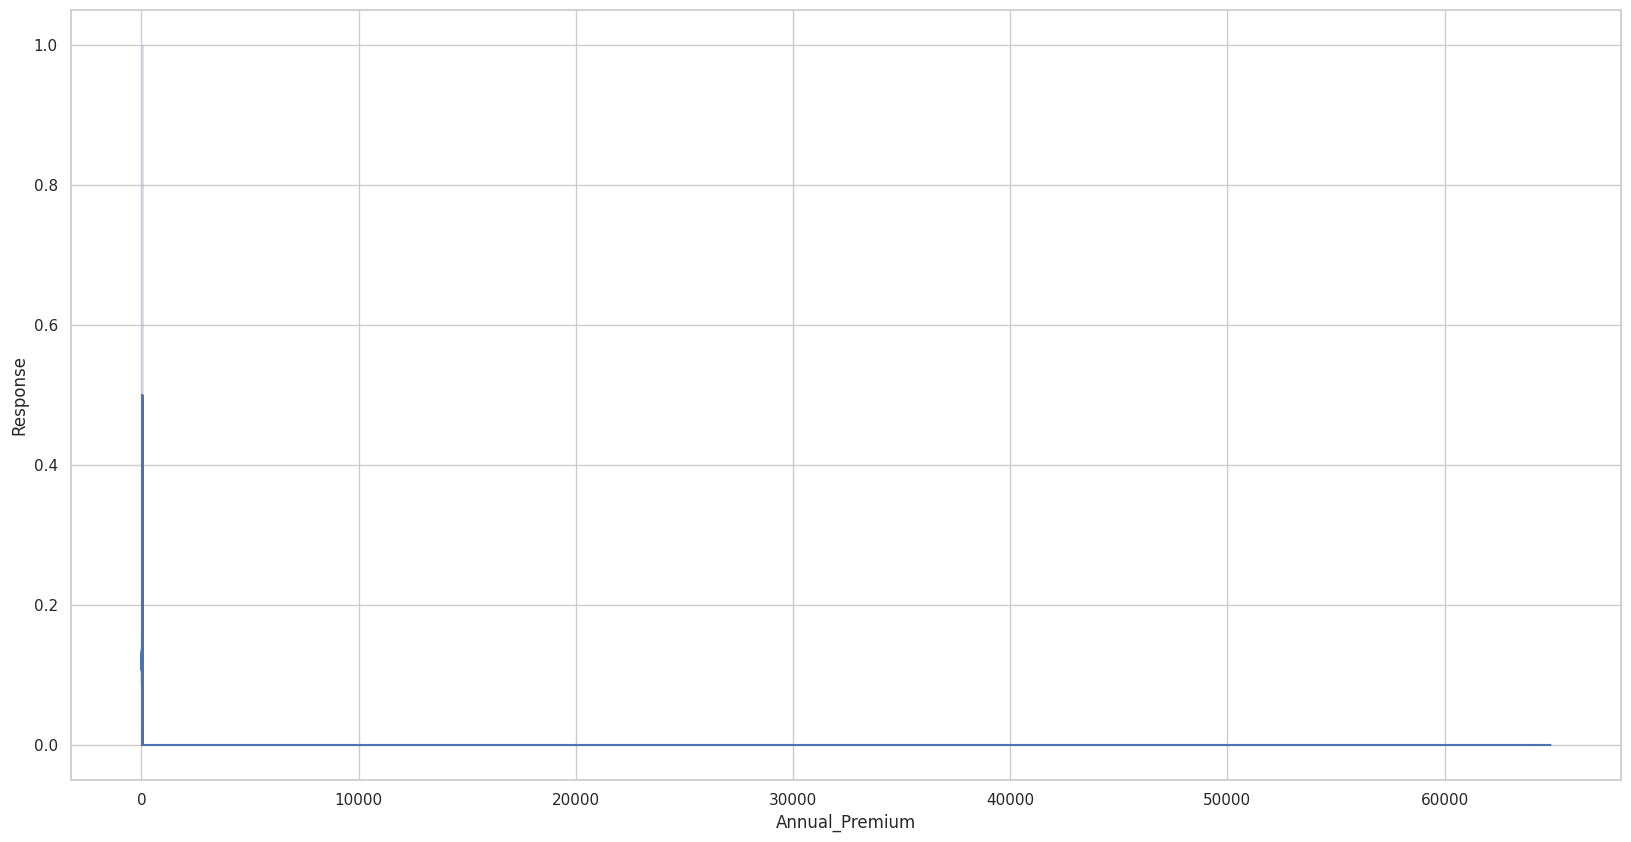

In [ ]:
# Chart - 8 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is line plot and its details are ",data.iloc[0:0,6],'\n')
sns.lineplot(x = data.iloc[:,6].value_counts(),y =data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

The Seaborn Line Plots display the connection or correlation between continuous and categorical values by representing them in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

The primary factor influencing customer response is the customer's specific needs, which take precedence over the annual premium amount.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company can adjust the annual premium amount strategically to enhance customer response.

#### Chart - 9

This is Line plot and its details are  Series([], Name: Policy_Sales_Channel, dtype: float64) 



<Axes: xlabel='Policy_Sales_Channel', ylabel='Response'>

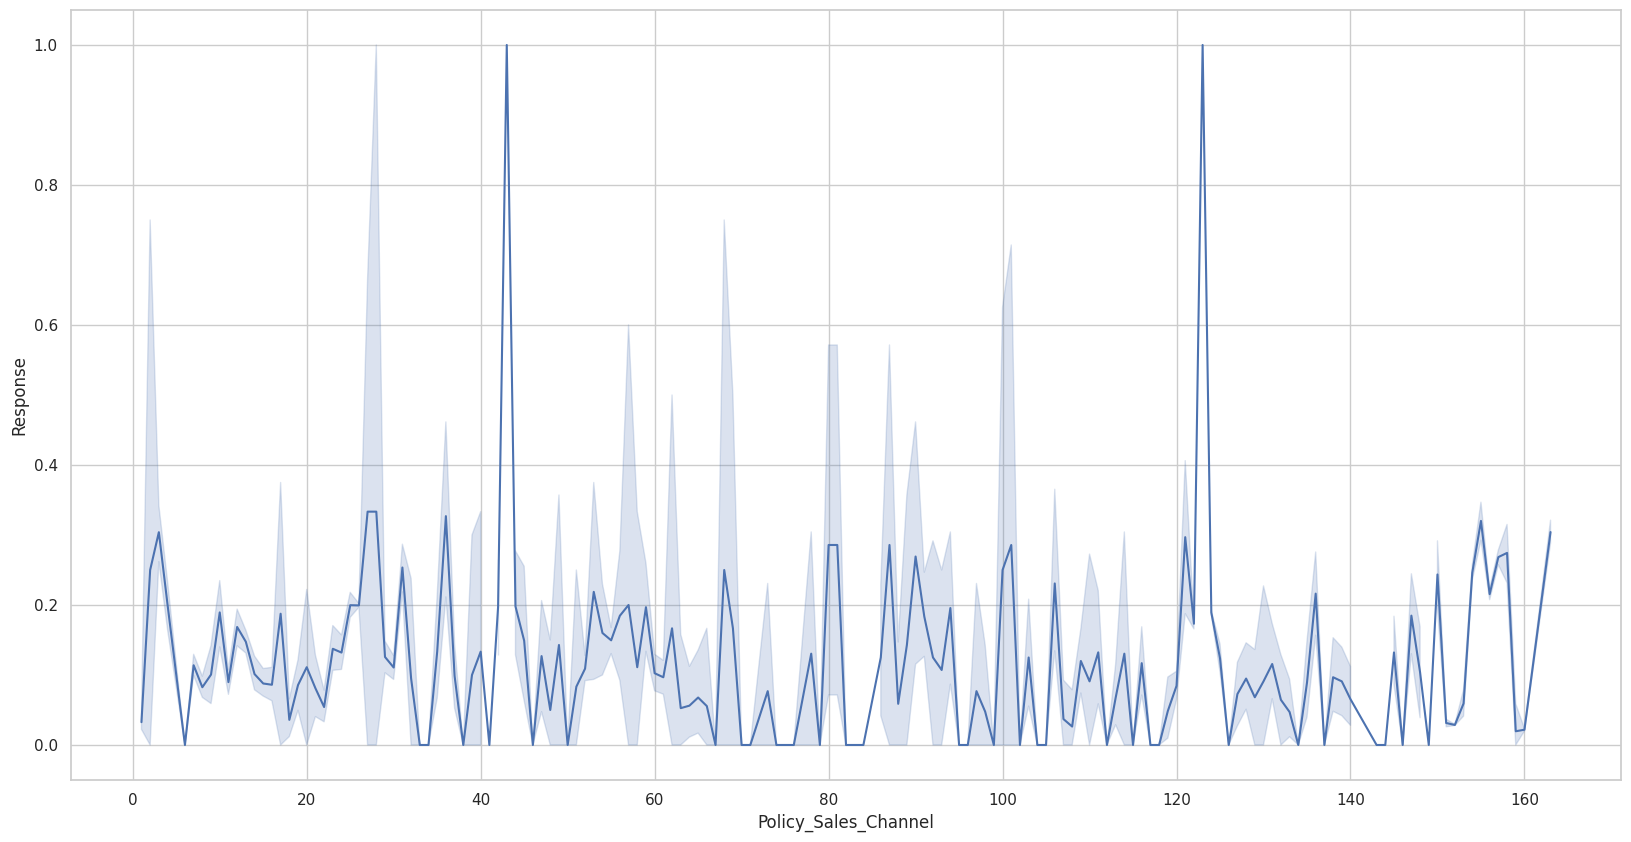

In [ ]:
# Chart - 9 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is Line plot and its details are ",data.iloc[0:0,7],'\n')
sns.lineplot(x = data.iloc[:,7],y = data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

The Seaborn Line Plots display the connection or correlation between continuous and categorical values by representing them in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

Customers between the ages of 40 to 45 and 120 to 125 are more responsive to the agent's offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To improve the performance of other insurance agents, the insurance company can organize workshops and training sessions.

#### Chart - 10

This is Line Plot and its details are  Series([], Name: Vintage, dtype: int64) 



<Axes: xlabel='Vintage', ylabel='Response'>

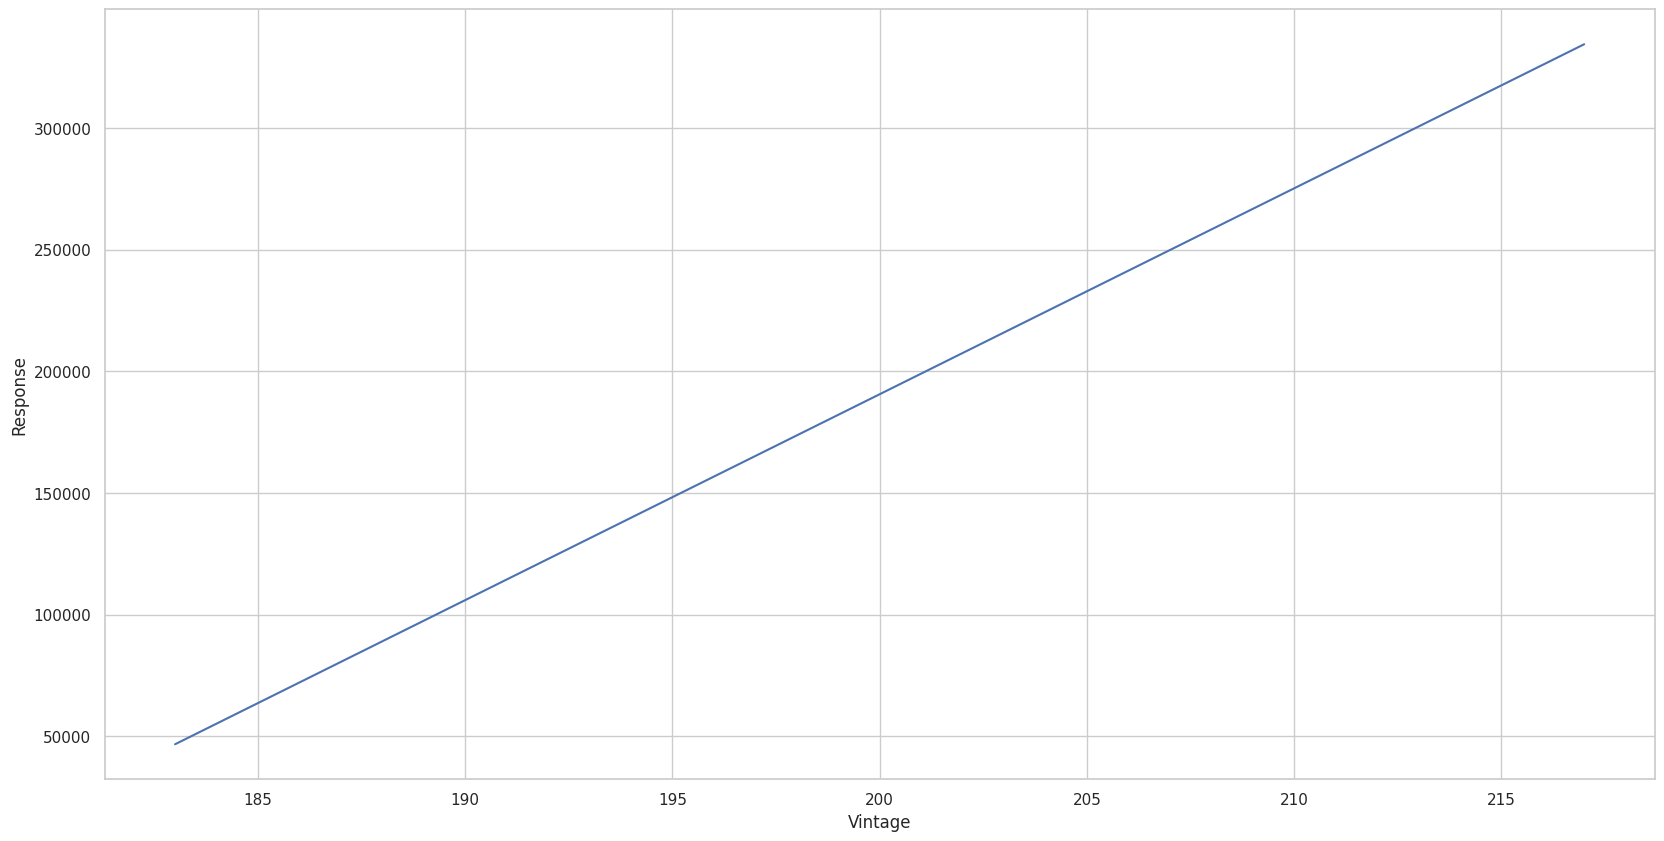

In [ ]:
# Chart - 10 visualization code
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
print("This is Line Plot and its details are ",data.iloc[0:0,8],'\n')
sns.lineplot(x = data.iloc[:,8],y = data.iloc[:,-1].value_counts())

##### 1. Why did you pick the specific chart?

The Seaborn Line Plots display the connection or correlation between continuous and categorical values by representing them in a continuous data point format.

##### 2. What is/are the insight(s) found from the chart?

Customers with older or more vintage vehicles tend to be more responsive to the insurance company's offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insurance company should consider targeting the market of individuals with vintage vehicles, as they have shown higher responsiveness, which could potentially boost the company's sales.

#### Chart - 11 - Correlation Heatmap

<Axes: >

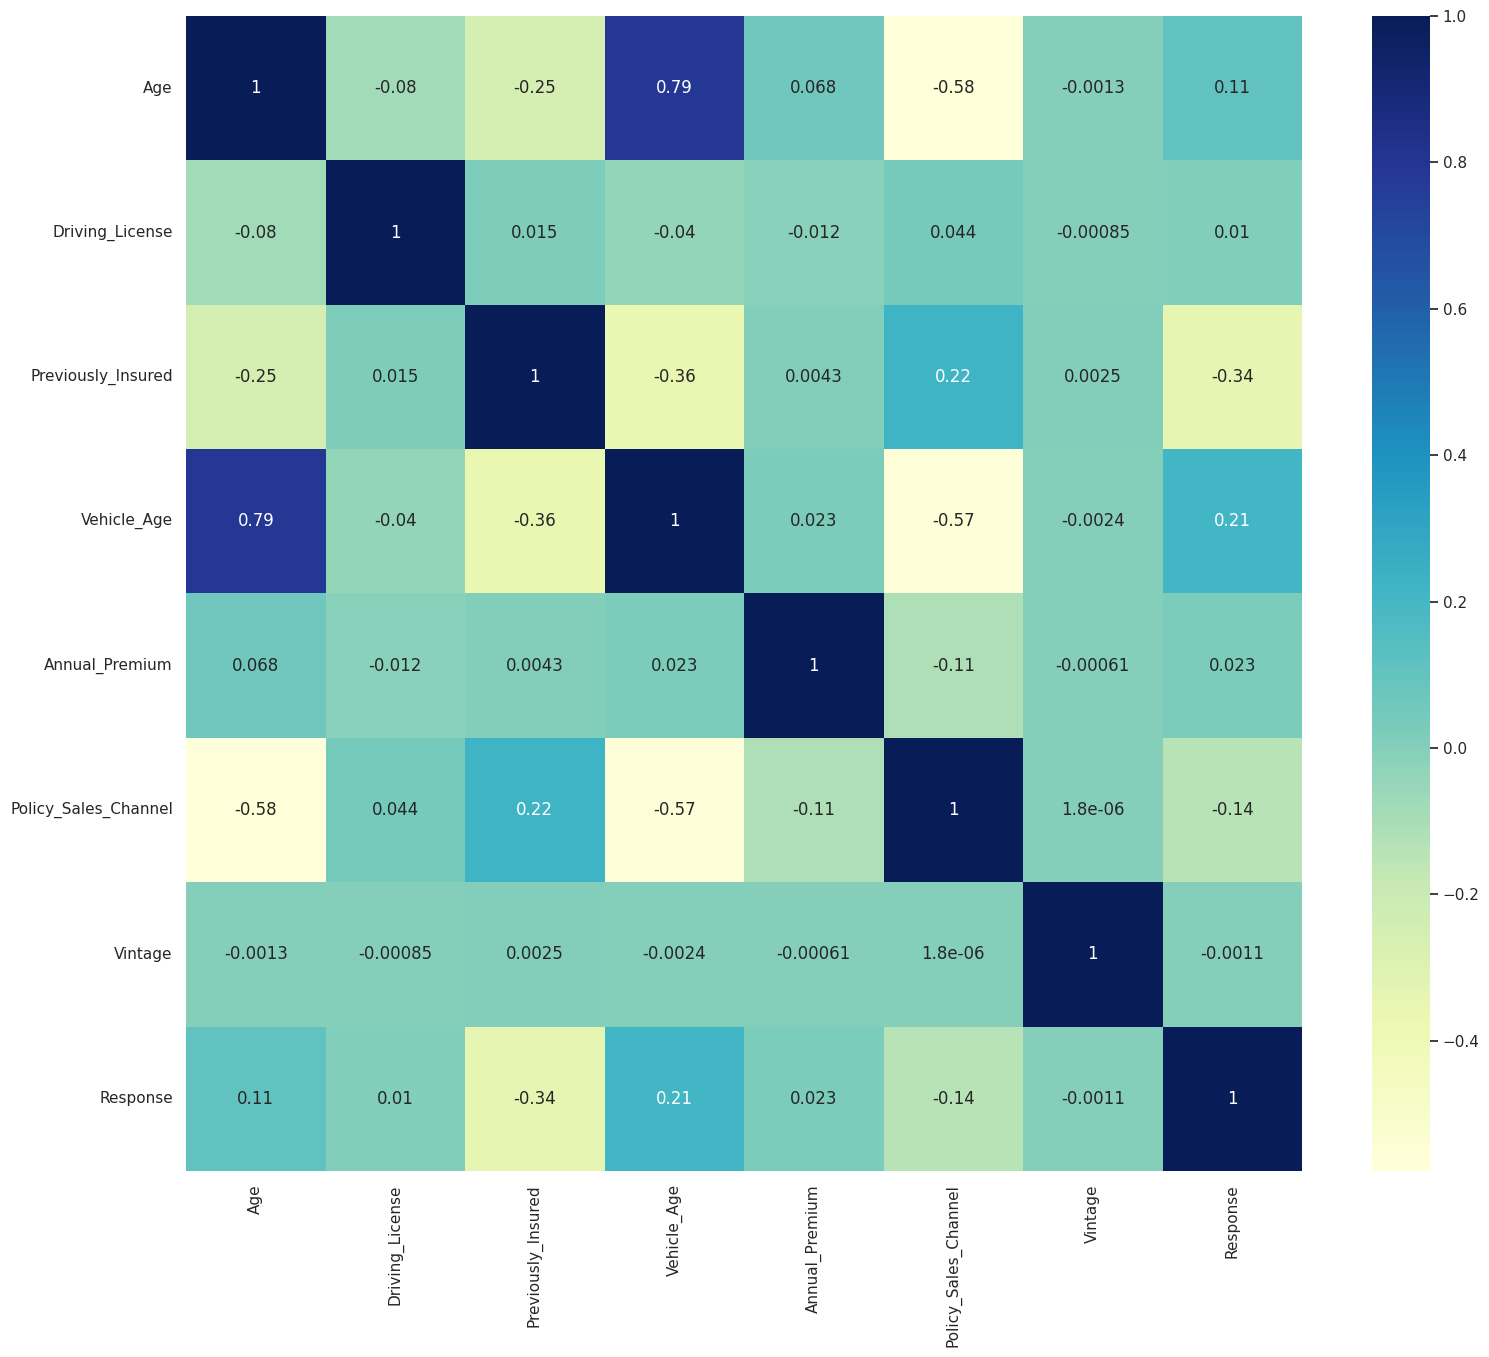

In [ ]:
# Correlation Heatmap visualization code
newdata = data.drop(['Gender','Vehicle_Damage'],axis=1)
fig = plt.figure(figsize=(18,15))
sns.set(style='whitegrid')
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

There is a negative correlation of -0.58 between age and policy sales channel, suggesting that older individuals tend to be less inclined to engage with sales channels. Similarly, there is a negative correlation of -0.57 between policy sales channel and vehicle age, indicating that sales channels may not actively promote insurance sales for older vehicles.

#### Chart - 12 - Pair Plot

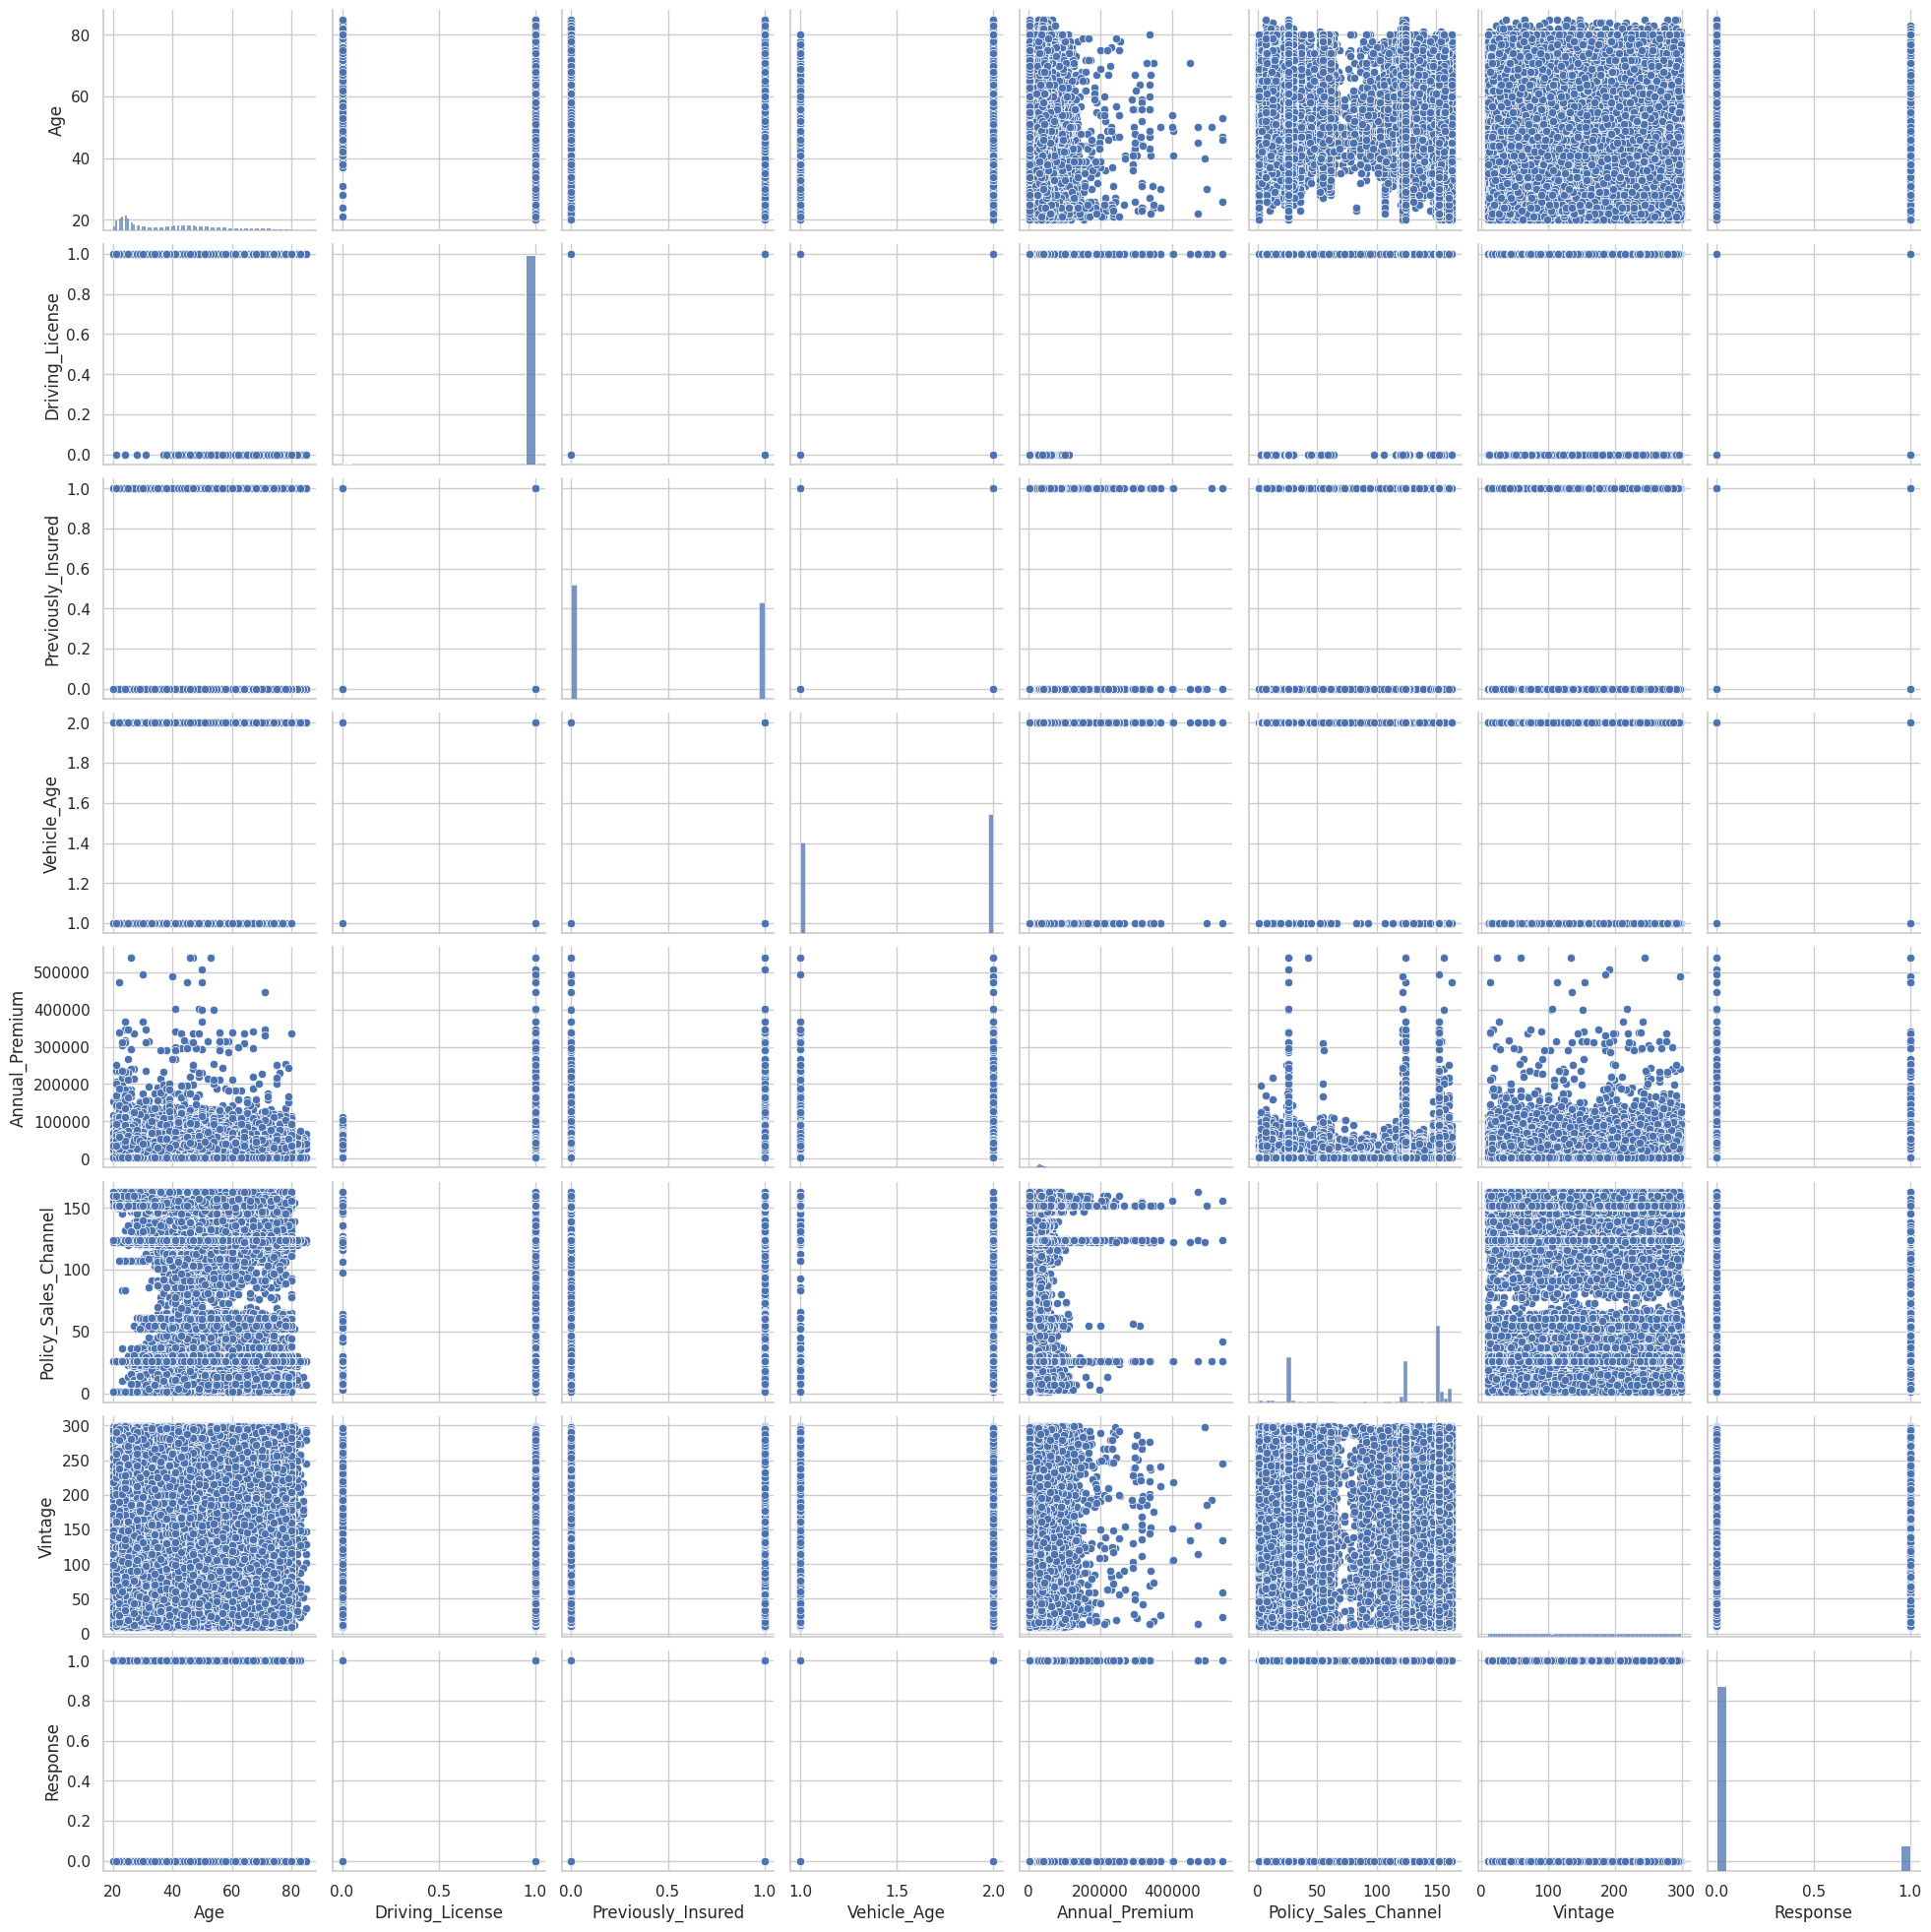

In [ ]:
# Pair Plot visualization code
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us to understand the data by summarising a large amount of data in single figures.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot, it can be observed that there is no significant collinearity among the independent variables, suggesting that they do not strongly depend on each other, and there is no strong linear relationship between them.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In the hypothesis testing conducted on the Age and Previously_Insured columns, the null hypothesis (H0) states that customers who are previously insured have an age greater than 30. Conversely, the alternative hypothesis (Ha) posits that previously insured customers have an age less than 30.

H0: Age of previously insured customers > 30

Ha: Age of previously insured customers < 30

This hypothesis testing aims to determine if there is a significant difference in the ages of customers who are previously insured compared to those who are not previously insured, specifically focusing on whether previously insured customers tend to be younger (age < 30).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Making copy of df_clean_frame
hypothesis = data[['Age','Previously_Insured']].copy()
hypothesis = hypothesis[hypothesis["Previously_Insured"] == 1]

# Group_by duration and target_ages
group_by_= hypothesis['Previously_Insured'].groupby(by=hypothesis['Previously_Insured'])

# Mean of group_by variable
group=group_by_.mean()

# In A and B variable grouping values
one = (hypothesis.loc[hypothesis["Age"] > 30 ]).sum()
print(one)
two = (hypothesis.loc[hypothesis["Age"] < 30]).sum()

# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for Previously_Insured age less than 30 years {} \n Mean for Previously_Insured age more than 30 years {}'.format(Mean1,Mean2))
print('Std deviation for Previously_Insured age less than 30 years {} \n Std deviation for Previously_Insured age more than 30 years {}'.format(SD2,SD1))

Age                   3446785
Previously_Insured      69049
dtype: int64
Mean for Previously_Insured age less than 30 years 1757917.0 
 Mean for Previously_Insured age more than 30 years 1289823.5
Std deviation for Previously_Insured age less than 30 years 1679724.3805340505 
 Std deviation for Previously_Insured age more than 30 years 2388420.0306579242


In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(one, two, equal_var=False)

print('p-value:', p_val)
print('t-value:', t_stat)

p-value: 0.8438118404044405
t-value: 0.22671190535034952


##### Which statistical test have you done to obtain P-Value?

I have performed a two-sample t-test. This test is used to determine if there is a significant difference between the means of two independent groups. In this case, it appears to be comparing two datasets represented by the variables 'one' and 'two'. The 'p-value' and 't-value' are the results of this t-test, which are used to assess the statistical significance of the observed difference between the two groups.

##### Why did you choose the specific statistical test?

A p-value is a statistical metric used to assess the validity of a hypothesis based on observed data. It quantifies the likelihood of obtaining the observed results under the assumption that the null hypothesis is true. A lower p-value indicates greater statistical significance for the observed differences.

Here are the statistics for the dataset:
*   Total number of data points for Age: 3,446,785
*   Total number of data points for Previously_Insured: 69,049

Additionally, for customers who are Previously_Insured:
*   Mean age for those under 30 years: 1,757,917.0
*   Mean age for those over 30 years: 1,289,823.5
*   Standard deviation for those under 30 years: 1,679,724.38
*   Standard deviation for those over 30 years: 2,388,420.03

These statistics provide information about the dataset and the ages of customers who are previously insured, both under and over 30 years of age.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(data.isnull().value_counts())

Gender  Age    Driving_License  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response
False   False  False            False               False        False           False           False                 False    False       381109
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there are no missing values in the dataset, there is no need to employ any imputation techniques.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
for i in range(1,len(data.columns)):
  lower_bound = []
  upper_bound = []

  if np.issubdtype(data.iloc[:,i].dtype, np.number) == True:  # check if column is numerical or not

    q1 = np.percentile(data.iloc[:,i],25)
    q3 = np.percentile(data.iloc[:,i],75)

    IQR = q3 - q1

    lower_bound.insert(i,q1 - (IQR * 1.5))
    upper_bound.insert(i,q3 + (IQR * 1.5))

    df=pd.DataFrame({'index': i,'l' :lower_bound,'u':upper_bound})
print(df)

   index    l    u
0      9  0.0  0.0


In [ ]:
#importing relevant library
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

              variables        VIF
0                   Age  20.405075
1       Driving_License  42.806085
2    Previously_Insured   2.111012
3           Vehicle_Age  32.461594
4        Annual_Premium   4.187440
5  Policy_Sales_Channel   8.076137
6               Vintage   4.373345


<Axes: >

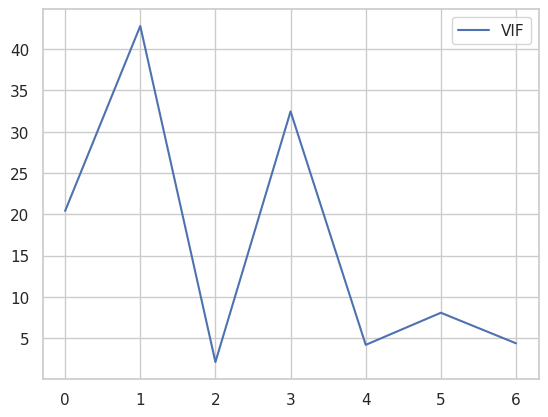

In [ ]:
# Calculating VIF for all the columns
print(calc_vif(data[[i for i in data.describe().columns if i not in ['Gender','Vechile_Damage','Response']]]))
(calc_vif(data[[i for i in data.describe().columns if i not in ['Gender','Vechile_Damage','Response']]])).plot()
# We will plot the VIF obtain by the  VIF function

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier treatment techniques used here is the IQR method, which is a common approach to identify and handle outliers in numerical data. It involves setting bounds based on the spread of data, and values outside these bounds are considered outliers.

The use of VIF is for identifying multicollinearity among independent variables. High VIF values can indicate that certain predictors are highly correlated, which can affect the interpretation and reliability of regression models.

### 3. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
dependent = data['Response']
independent = data.drop('Response',axis=1)
independent.shape
xtrain,xtest,ytrain,ytest = train_test_split(independent,dependent,test_size=.3,random_state = 54)

##### What data splitting ratio have you used and why?

I have used a data splitting ratio of 70:30, with 70% of the data being allocated to the training set (xtrain, ytrain) and 30% to the test set (xtest, ytest). A 70:30 split is often considered a good starting point for many machine learning tasks. It provides a balance between having enough data for training (70%) to build a robust model and a sufficiently large test set (30%) to evaluate the model's performance effectively.

### 4. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_columns = OneHotEncoder(drop = 'first', sparse=False, dtype=np.int16, handle_unknown="ignore")
# This will convert categorical variable to integer numerical variables.

In [ ]:
# We will define object type columns here.
objectcoders = ['Gender','Vehicle_Damage']
# We wiil define numericsl columns here.
numcoders = ['Driving_License', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage']

In [ ]:
# Applying Transformer Encoder
transformer = ColumnTransformer(transformers = [('tnfnum', categorical_columns, numcoders),('tnfobj', categorical_columns, objectcoders)],remainder = 'passthrough')

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have applied One-Hot Encoding to categorical columns, specifically 'Gender' and 'Vehicle_Damage.' One-Hot Encoding represents categorical variables as binary (0 or 1) vectors, where each category is converted into a separate binary column. This technique is chosen because it's suitable for handling categorical variables with no inherent ordinal relationship, ensuring that the machine learning model does not misinterpret categorical data as having a meaningful numerical order.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Fitting transformer Encoder on Xtrain.
xtrain,xtest,ytrain,ytest = train_test_split(independent,dependent,test_size=.3,random_state = 54)
xtrain = transformer.fit_transform(xtrain)
# Applying transformer  encoder on xtest.
xtest = transformer.transform((xtest))
xtrain.shape

(266776, 445)

I imported the OneHotEncoder and applied nominal categorical transformation to the object type columns 'Gender' and 'Vehicle_Damage.' Additionally, I applied nominal categorical transformation to the numerical type columns 'Driving_License,' 'Previously_Insured,' 'Policy_Sales_Channel,' and 'Vintage.'

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
xtrain = rob.fit_transform(xtrain)
xtest = rob.transform(xtest)

##### Which method have you used to scale you data and why?

I have chose Robust Scaler. It is chosen to ensure that the scaling process is robust to outliers and capable of handling data with non-normal distributions or varying variances. It is particularly useful when dealing with datasets where extreme values may exist, such as in insurance data where certain policy features or claims amounts can be outliers.

## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression()
# Fit the Algorithm
model1= lr.fit(xtrain,ytrain)
# Predict on the model
ypred = lr.predict(xtest)
print(ypred)

[0 0 0 ... 0 0 0]


<Axes: ylabel='Response'>

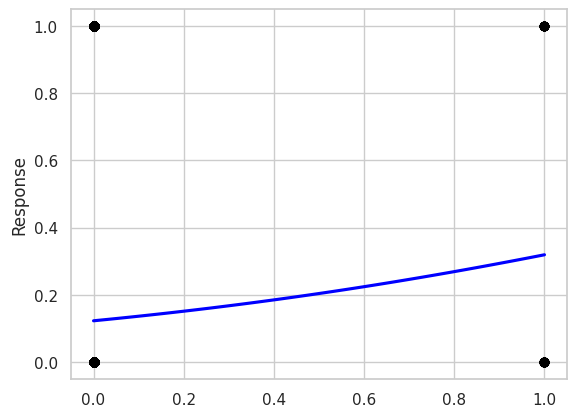

In [ ]:
sns.regplot(x=ypred, y=ytest, data=data, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})

<Axes: xlabel='Response', ylabel='Density'>

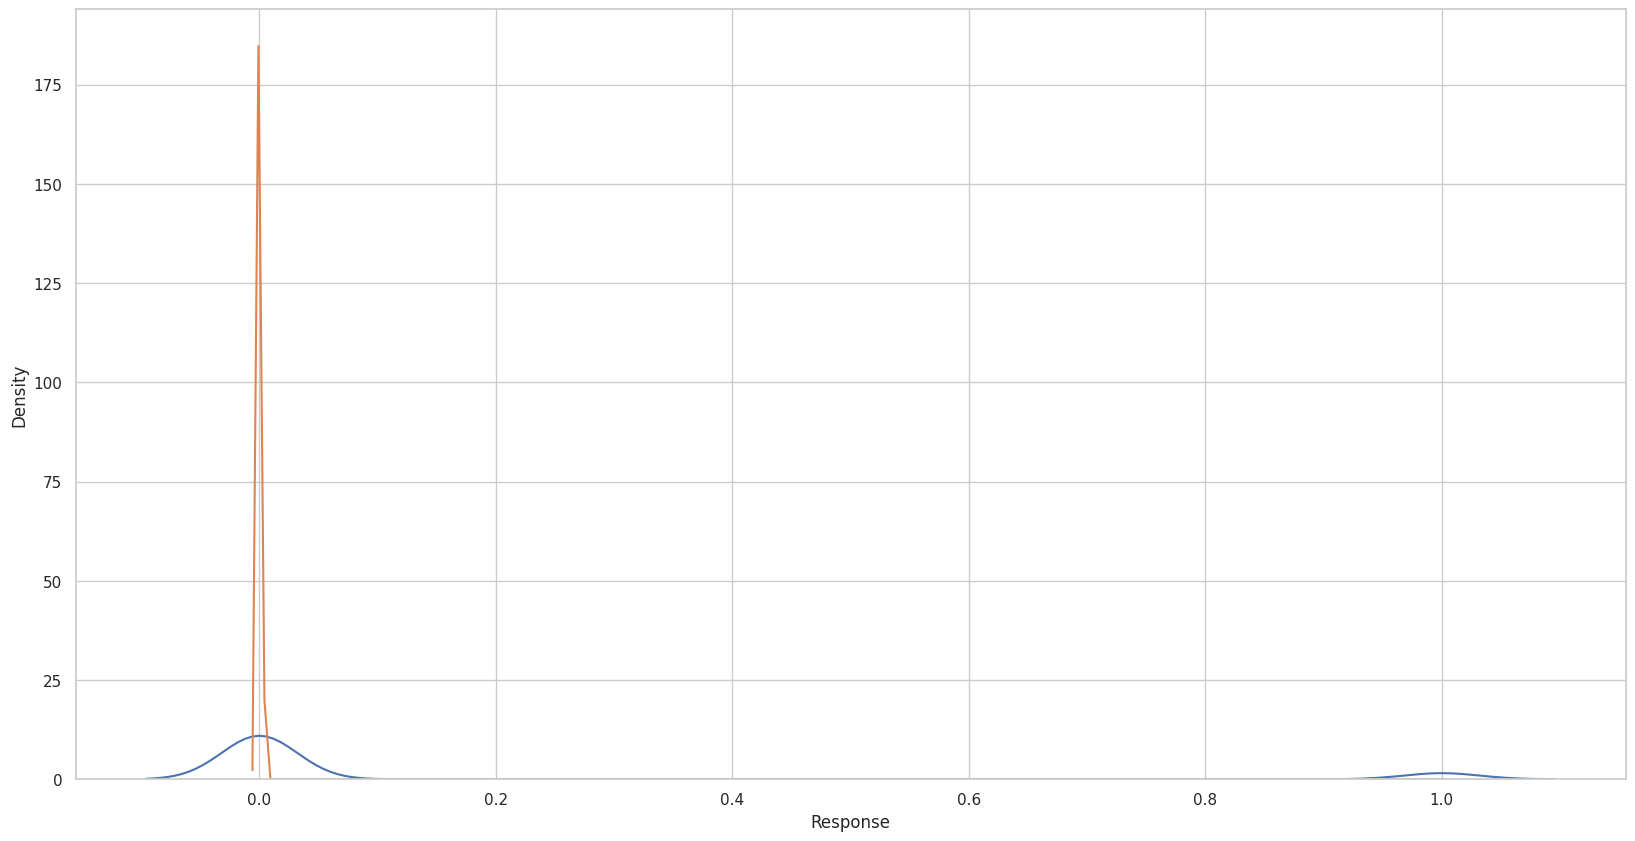

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
sns.kdeplot(ytest)
sns.kdeplot(ypred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

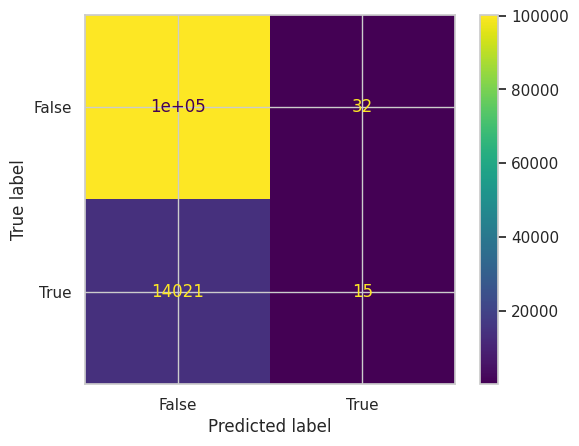

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix(ytest, ypred)
actual = ytest
predicted = ypred
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.8770871052102193


In [ ]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.3191489361702128


In [ ]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall)

0.0010686805357651753


In [ ]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity)

0.9996809475856706


In [ ]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score)

0.0021302279343889795


We began our analysis by constructing a confusion matrix, which provided us with the following performance metrics:
*   Accuracy: The model achieved an accuracy rate of 0.87, indicating the proportion of correctly predicted outcomes.
*   Precision: The precision score was 0.31, reflecting the ability of the model to accurately identify positive cases among those it predicted as positive.
*   Sensitivity (Recall): The sensitivity or recall rate was 0.001, indicating the proportion of true positive cases correctly identified by the model.
*   Specificity: The specificity score stood at 0.99, signifying the model's ability to accurately identify negative cases among those it predicted as negative.

Additionally, we calculated the F1 score, which was found to be 0.0021, representing a harmonic mean between precision and recall. These metrics collectively help assess the model's performance in classification tasks, providing insights into its strengths and weaknesses.

### ML Model - 2 - Decision Tree

In [ ]:
# ML Model - 2 Implementation
tree = DecisionTreeClassifier(min_samples_leaf=20,criterion='entropy', random_state=20)
tree.fit(xtrain, ytrain)
print("Regresion Model Score" , ":" , tree.score(xtrain, ytrain) , "\n" ,
      "Out of Sample Test Score" ,":" , tree.score(xtest, ytest))
print("\n")
# Fit the Algorithm
yl_predicted = tree.predict(xtrain)
yl_test_predicted = tree.predict(xtest)

Regresion Model Score : 0.8843486670465109 
 Out of Sample Test Score : 0.8660579185362056




<Axes: xlabel='Response', ylabel='Density'>

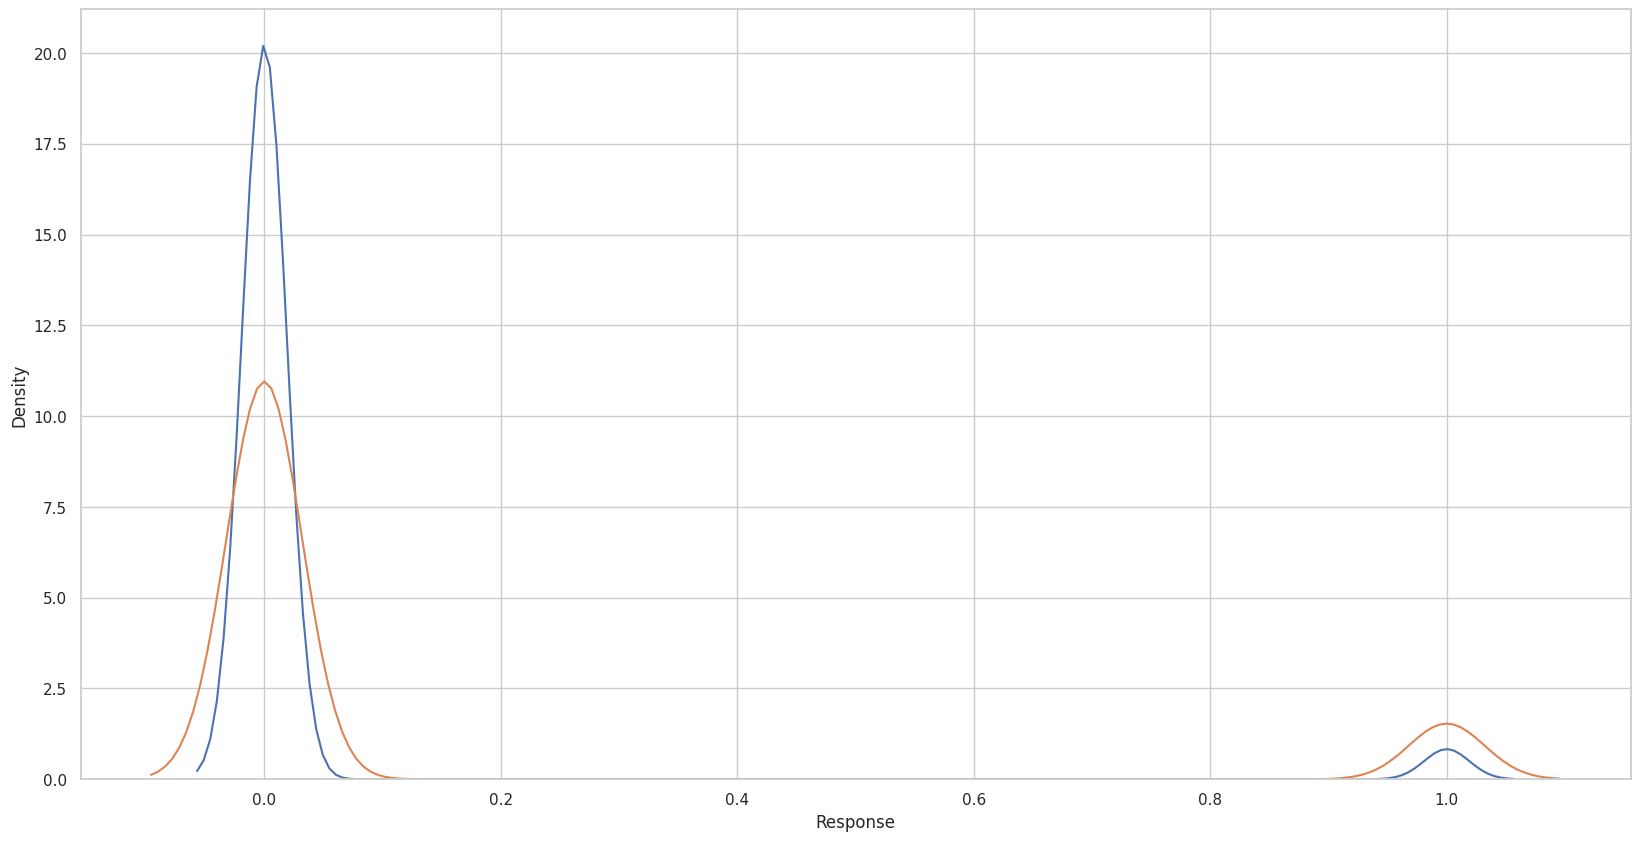

In [ ]:
# Predict on the model
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
sns.kdeplot(yl_test_predicted)
sns.kdeplot(ytest)

                                  names     score
441          tnfobj__Vehicle_Damage_Yes  0.596066
444           remainder__Annual_Premium  0.145232
442                      remainder__Age  0.117539
1          tnfnum__Previously_Insured_1  0.071471
141  tnfnum__Policy_Sales_Channel_152.0  0.011049
149  tnfnum__Policy_Sales_Channel_160.0  0.009412
440                 tnfobj__Gender_Male  0.009132
25    tnfnum__Policy_Sales_Channel_26.0  0.006704
116  tnfnum__Policy_Sales_Channel_124.0  0.004208
145  tnfnum__Policy_Sales_Channel_156.0  0.002587


<Axes: >

<Figure size 640x480 with 0 Axes>

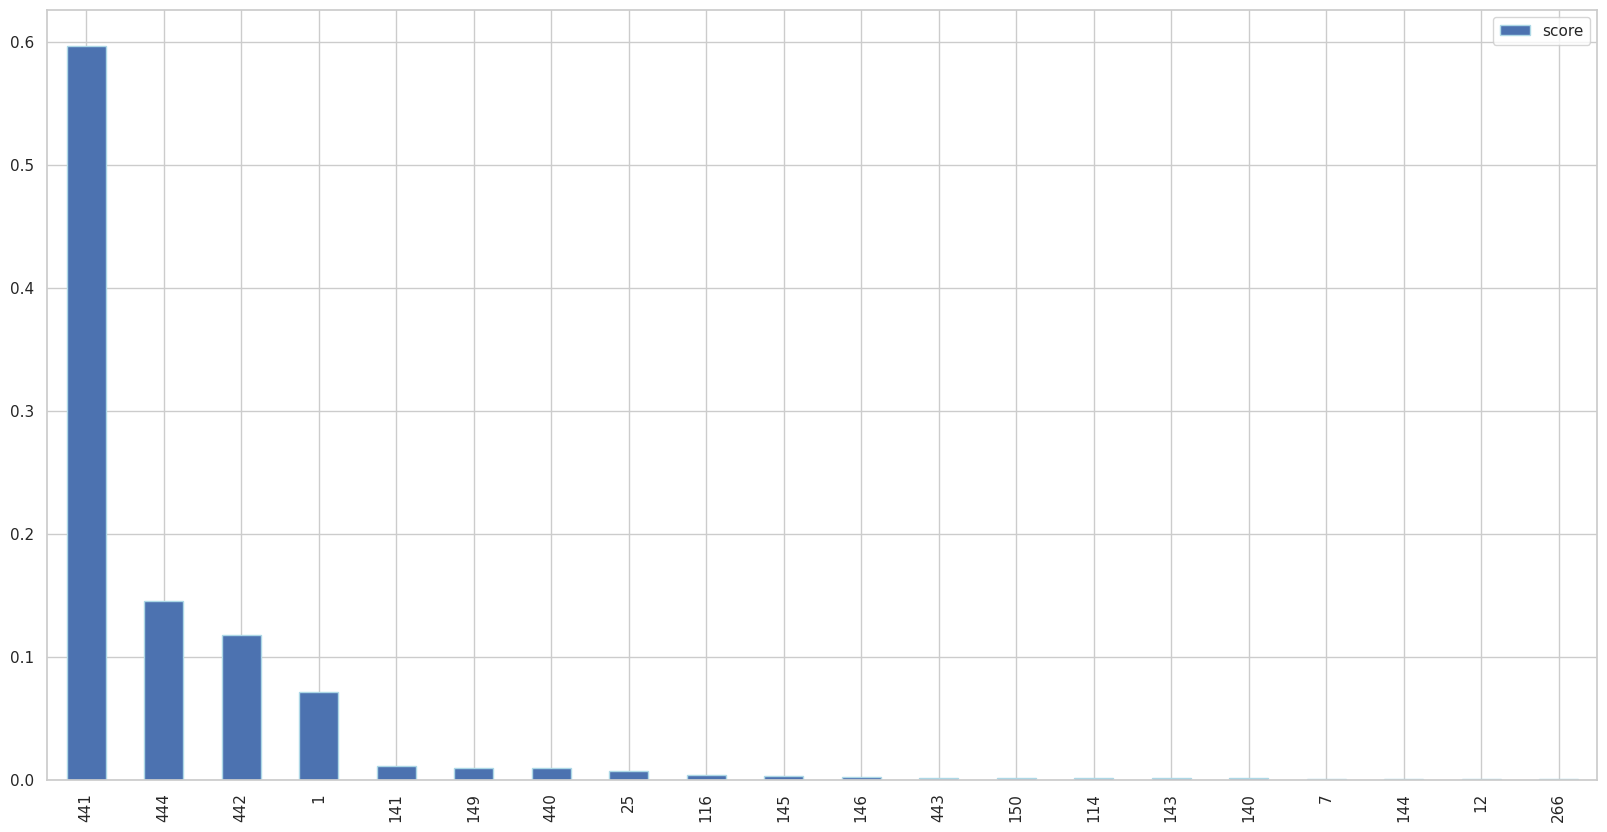

In [ ]:
# Creating an empty dataframe
featurenames = pd.DataFrame()
# Saving feature names of columns in dataframe
featurenames['names'] = pd.DataFrame(transformer.get_feature_names_out())

# Get importance
importance = tree.feature_importances_
# Summarize feature importance
featurenames['score'] = importance
# Plot feature importance
fig = plt.figure(linewidth=10,edgecolor="lightblue")
print(featurenames[['names','score']].nlargest(10,'score'))
(featurenames[['names','score']].nlargest(20,'score')).plot(kind='bar',figsize=(20,10),style='whitegrid', edgecolor=fig.get_edgecolor())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

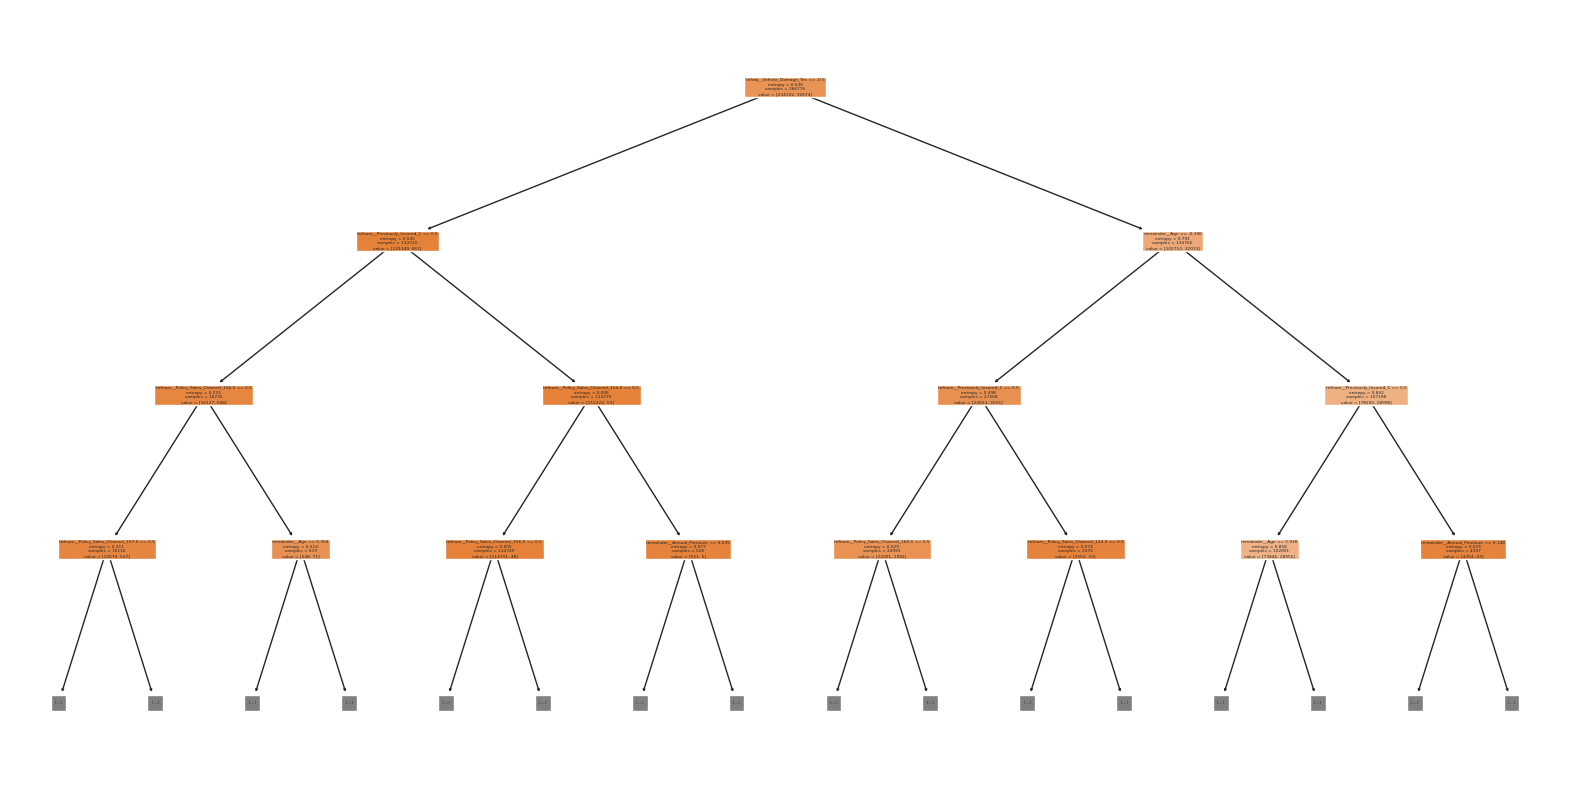

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
plot_tree(tree,max_depth=3,filled = True, feature_names=featurenames['names'])
plt.show()

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

By analyzing the feature graph, we can identify key factors that significantly influence the insurance company's operations:
*   Vehicle Damage: The presence of vehicle damage (specifically, 'Vehicle_Damage_Yes') has a substantial impact with a weight of 0.596066. This suggests that customers who have experienced vehicle damage are more likely to engage with the insurance company.
*   Annual Premium: The annual premium amount ('Annual_Premium') is another important factor, contributing significantly with a weight of 0.145232. This indicates that the pricing strategy for annual premiums can influence customer engagement.
*   Age: The age of customers ('Age') also plays a notable role, with a weight of 0.117539. This suggests that targeting specific age groups or tailoring insurance products based on age demographics can impact sales.

In summary, understanding these crucial features allows the insurance company to potentially adjust its sales strategies and offerings. By focusing on customers who have experienced vehicle damage, optimizing annual premium pricing, and considering age-related preferences, the company can enhance its sales and customer engagement strategies to drive business growth.

### ML Model - 3 - Random Forest Classifier

In [ ]:
# ML Model - 3 Implementation
rdf = RandomForestClassifier(n_estimators = 100, max_depth = 50, max_features = 150, bootstrap = True, random_state = 18)
rdf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=50, max_features=150, random_state=18)

In [ ]:
# Fit the Algorithm
print("Regresion Model Score" , ":" , rdf.score(xtrain, ytrain) , "\n" ,"Out of Sample Test Score" ,":" , rdf.score(xtest, ytest))
print("\n")

Regresion Model Score : 0.9125296128587279 
 Out of Sample Test Score : 0.8741133356073925




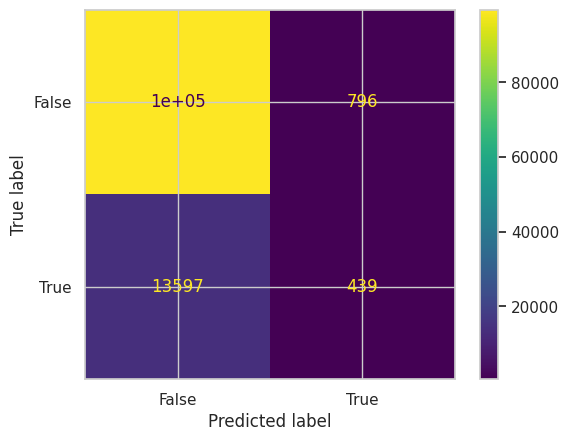

accuracy score 0.8741133356073925
F1 score 0.057494597603300376


In [ ]:
# Predict on the model
# Create our predictions
yr_test_predicted = rdf.predict(xtest)

# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(ytest, yr_test_predicted)
actual = ytest
predicted = yr_test_predicted
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Display accuracy score
accuracy = accuracy_score(ytest, yr_test_predicted)
print('accuracy score',accuracy)

# Display F1 score
f1score = f1_score(ytest, yr_test_predicted)
print("F1 score",f1score)

<Axes: xlabel='Response', ylabel='Density'>

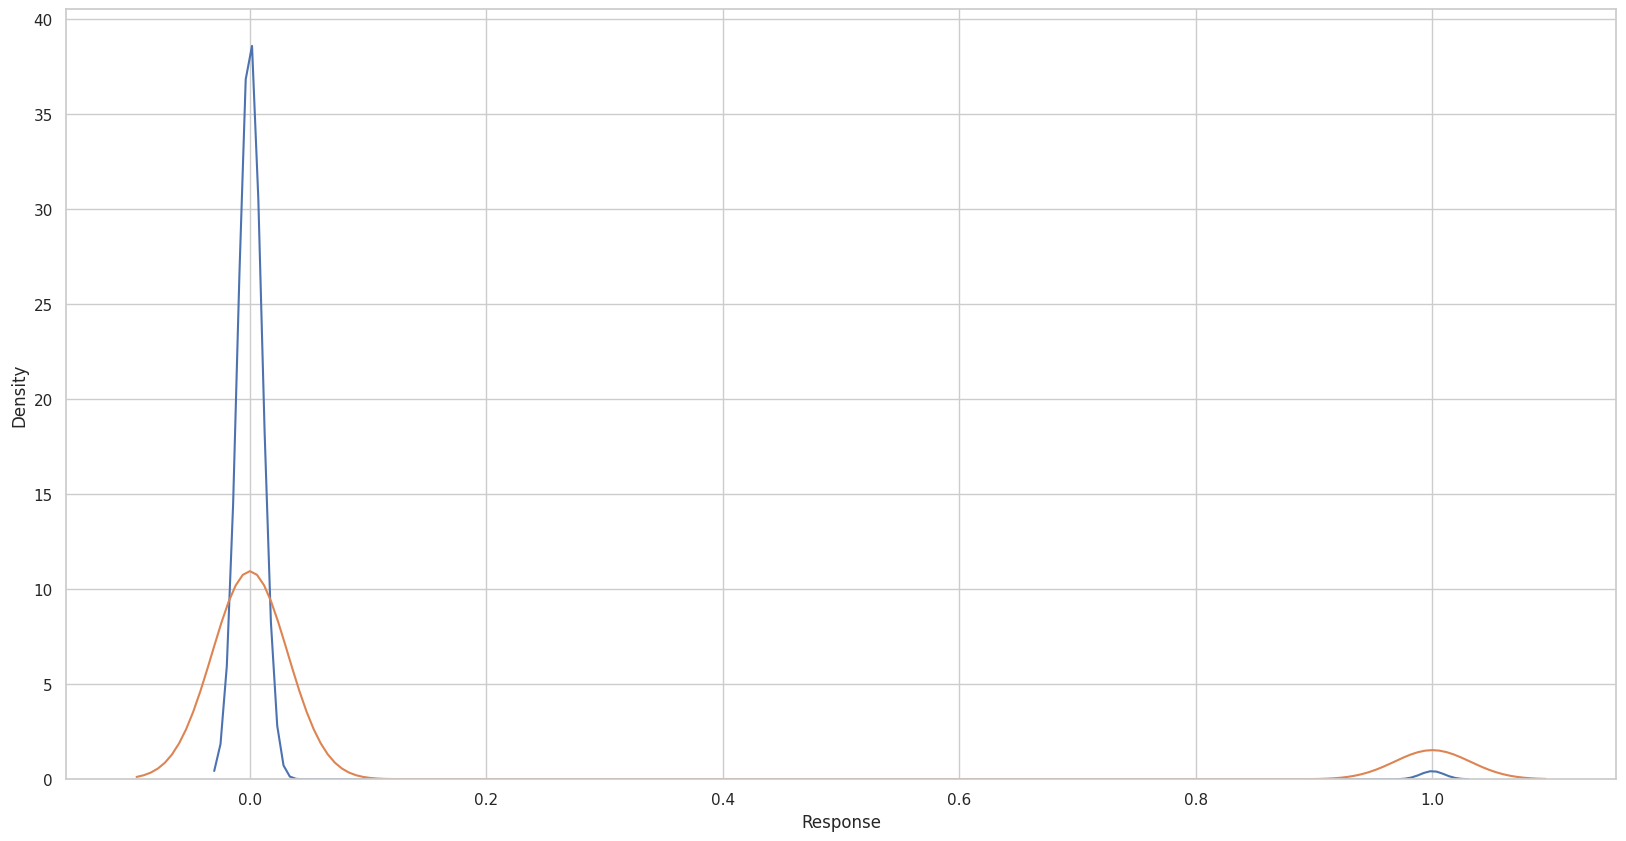

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
sns.kdeplot(yr_test_predicted)
sns.kdeplot(ytest)

                                  names     score
444           remainder__Annual_Premium  0.148969
442                      remainder__Age  0.142113
441          tnfobj__Vehicle_Damage_Yes  0.134771
1          tnfnum__Previously_Insured_1  0.107975
141  tnfnum__Policy_Sales_Channel_152.0  0.027858
440                 tnfobj__Gender_Male  0.021654
443              remainder__Vehicle_Age  0.017280
116  tnfnum__Policy_Sales_Channel_124.0  0.009969
25    tnfnum__Policy_Sales_Channel_26.0  0.007524
149  tnfnum__Policy_Sales_Channel_160.0  0.007474


<Axes: >

<Figure size 640x480 with 0 Axes>

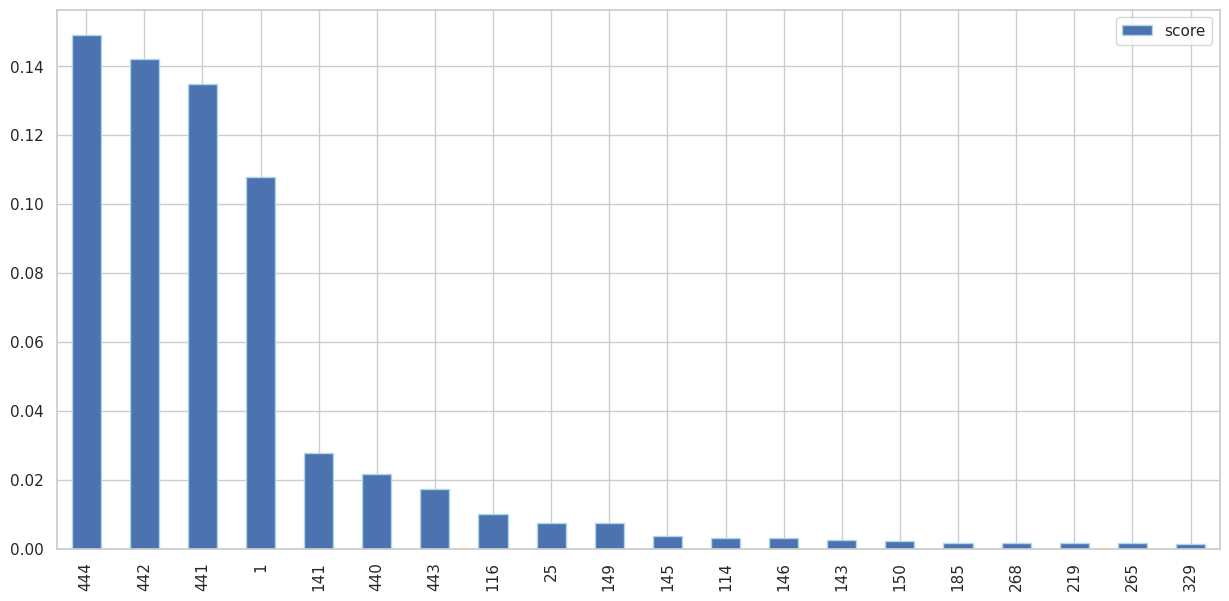

In [ ]:
# Get importance
importance = rdf.feature_importances_

# Summarize feature importance
featurenames['score'] = importance

# Plot feature importance
fig = plt.figure(linewidth=10,edgecolor="lightblue")
print(featurenames[['names','score']].nlargest(10,'score'))
(featurenames[['names','score']].nlargest(20,'score')).plot(kind='bar',figsize=(15,7),style='whitegrid', edgecolor=fig.get_edgecolor())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

The Random Forest Classifier constructs a collection of decision trees by randomly selecting a subset of the training data. It essentially assembles multiple decision trees, each built from a different random subset of the training data. The final prediction is determined by aggregating the individual predictions made by these different decision trees through a voting process.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
parameters = {
    "n_estimators":[5,100],
    "max_depth":[4,50],
    "max_features" : [50]
}
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rdf,parameters,cv=3)
# Fit the Algorithm
cv.fit(xtrain,ytrain)
# Predict on the model
cv.best_params_

{'max_depth': 4, 'max_features': 50, 'n_estimators': 5}

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization. I chose this technique because it exhaustively searches over a specified parameter grid, which ensures that the best combination of hyperparameters is found. Additionally, it uses cross-validation to evaluate the model's performance, which gives a more accurate estimate of how well the model will generalize to new data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Through hyperparameter optimization for regression, we have determined that the combination of "n_estimators" set to 100 and "max_depth" set to 50 yields the best results.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

*   Confusion Matrix - In the context of machine learning, a confusion matrix is a fundamental tool used in the classification process. It helps organize and quantify the categorization of data into specific classes. In the machine learning workflow, you first define the problem, gather and preprocess the data, possibly engineer additional features, train a model, evaluate its performance, refine it using relevant cost functions, and ultimately prepare it for deployment.
*   Accuracy Score - The accuracy_score() function, found in libraries like scikit-learn, calculates accuracy by comparing the true labels of a dataset with the predicted labels generated by a model. It returns a floating-point value representing the accuracy of the predictions. In machine learning, various evaluation metrics are available in libraries like scikit-learn to assess model performance comprehensively.

Accuracy score = 0.8741133356073925

*   F1 Score - The F1 score is a performance metric that combines both precision and recall into a single value. It is computed using the formula: F1 = 2 * (precision * recall) / (precision + recall). This metric provides a balanced measure of a model's ability to correctly classify instances and retrieve relevant results, making it a valuable tool for evaluating classification models.

F1 score = 0.057494597603300376

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The accuracy_score() function accepts the actual (true) labels and the predicted labels as inputs and calculates the accuracy of the model's predictions. It returns a floating-point value representing this accuracy. In the scikit-learn library, you can find various useful functions for computing standard evaluation metrics.

For instance, the accuracy score for this model is measured at 0.8741133356073925.

Regarding the F1 score, it is a metric that combines both precision and recall, represented by the formula: F1 = 2 * (precision * recall) / (precision + recall). This metric provides a balanced assessment of a model's ability to make accurate classifications and effectively retrieve relevant results.

In the context of your model, the F1 score is calculated to be 0.057494597603300376.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest Classifier will be our choice due to its higher accuracy and its capability to provide insights into which features are most important for decision-making. These insights are valuable for management in enhancing services and boosting sales performance.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We visualized the feature importance, which highlighted the following crucial features along with their respective importance scores:
*   remainder__Annual_Premium - Importance Score: 0.148969
*   remainder__Age - Importance Score: 0.142113
*   tnfobj__Vehicle_Damage_Yes - Importance Score: 0.134771
*   tnfnum__Previously_Insured_1 - Importance Score: 0.107975
*   tnfnum__Policy_Sales_Channel_152.0 - Importance Score: 0.027858
*   tnfobj__Gender_Male - Importance Score: 0.021654
*   remainder__Vehicle_Age - Importance Score: 0.017280
*   tnfnum__Policy_Sales_Channel_124.0 - Importance Score: 0.009969
*   tnfnum__Policy_Sales_Channel_26.0 - Importance Score: 0.007524
*   tnfnum__Policy_Sales_Channel_160.0 - Importance Score: 0.007474

This feature importance analysis allows us to identify and prioritize the most influential features in our dataset, aiding in data-driven decision-making.

# **Conclusion**

In our capstone project, we embarked on a comprehensive analysis of a healthcare dataset obtained from Almabetter. This dataset, encompassing 381,109 rows and 12 columns, formed the bedrock of our machine learning-based classification project.

* Our journey commenced with rigorous data wrangling and judicious feature engineering, setting the stage for subsequent analysis and modeling. Following this, we delved into exhaustive exploratory data analysis, employing Univariate, Bivariate, and Multivariate analyses to glean deeper insights into the dataset's structure and characteristics.
* To construct our machine learning model, we carefully partitioned the dataset into training and testing sets, adhering to a 70:30 split. Appropriate data transformations and normalization techniques were then applied to ready the data for modeling.
* We implemented various classification algorithms, including Logistic Regression, Decision Trees, and the Random Forest Classifier. After a meticulous evaluation, it became evident that the Random Forest model outshone its counterparts, boasting the highest accuracy of 87%.
* Further enhancing our understanding of the model's performance, we delved into the relationship between the observed and target variables. This exploration shed light on how critical features, such as vehicle damage, annual premium, and age, played pivotal roles in influencing customer engagement and thereby contributing to the model's superior performance.
* Our project was underpinned by the objective of predicting customer interest in purchasing vehicle insurance. This predictive model holds immense potential for guiding the insurance company in tailoring communication strategies, optimizing business operations, and ultimately maximizing revenue.
* In addition to this, our exploration also involved hypothesis testing, providing valuable insights into the characteristics of customers displaying interest in insurance. Throughout the project, we diligently undertook crucial data preprocessing steps, effectively handled outliers using the IQR method, appropriately encoded categorical variables using One-Hot Encoding, and ensured the robustness of our data through scaling using the Robust Scaler.
* The insights garnered from feature importance analysis within the Random Forest model offered invaluable guidance. By identifying key drivers of customer engagement, such as vehicle damage, annual premium, and age, we empowered the insurance company to refine sales strategies and product offerings, thereby enhancing business growth.

In summation, our capstone project exemplifies the transformative power of data-driven decision-making within the insurance industry. Through meticulous analysis, modeling, and interpretation of results, we have not only provided actionable insights but also laid the groundwork for positive business impacts and improved customer engagement for the insurance company.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***